In [1]:
suppressPackageStartupMessages({
    library("edgeR")
    library("stringr")
    library("limma")
    library("RColorBrewer")
    library("Glimma")
    library("dplyr")
})

Warning message:
“package ‘limma’ was built under R version 4.1.3”


### Read in pseudo bulk count data and observation data for all batches and clusters

In [2]:
stage_order = make.names( c('Fetal', 'Neonatal', 'Infancy', 'Childhood', 'Adolescence', 'Adult'))
stage_order

[1] "Fetal"       "Neonatal"    "Infancy"     "Childhood"   "Adolescence"
[6] "Adult"

In [3]:
counts <- read.delim( "../data/limma-voom/bulked-by-batch_pseudo-bulk-cts_min10.csv", row.names=1, sep=',')
obs    <- read.delim( "../data/limma-voom/bulked-by-batch_obs-cts_min10.csv", row.names=1, sep=',')

In [4]:
head( counts)

RL2103_ga22_v3 RL2107_ga24_v3 RL2121_ga34_v3
ENSG00000238009--RP11-34P13.7   1              1               2           
ENSG00000237683--AL627309.1     0              0               0           
ENSG00000239906--RP11-34P13.14  0              0               1           
ENSG00000228463--AP006222.2    59             34              25           
ENSG00000237094--RP4-669L17.10 41             29             131           
ENSG00000235146--RP5-857K21.2   2              0               0           
                               RL1777_2d_v3 RL1612_34d_v2 RL2100_86d_v3
ENSG00000238009--RP11-34P13.7    6           3              4          
ENSG00000237683--AL627309.1      5           1              4          
ENSG00000239906--RP11-34P13.14   1           0              0          
ENSG00000228463--AP006222.2    157          89            119          
ENSG00000237094--RP4-669L17.10 104          59            168          
ENSG00000235146--RP5-857K21.2    0           0              0          
                               RL2104_118d_v3 RL2108_179d_v3 RL2122_301d_v3
ENSG00000238009--RP11-34P13.7   14              1              7           
ENSG00000237683--AL627309.1      1              0              0           
ENSG00000239906--RP11-34P13.14   2              0              0           
ENSG00000228463--AP006222.2    317            102             88           
ENSG00000237094--RP4-669L17.10 129             67            284           
ENSG00000235146--RP5-857K21.2   12              0              1           
                               RL2125_422d_v3 ⋯ RL2110_10yr_v3 RL2126_10yr_v3
ENSG00000238009--RP11-34P13.7   15            ⋯  0              10           
ENSG00000237683--AL627309.1      0            ⋯  0               1           
ENSG00000239906--RP11-34P13.14   0            ⋯  0               0           
ENSG00000228463--AP006222.2    263            ⋯ 25             156           
ENSG00000237094--RP4-669L17.10 200            ⋯ 23             268           
ENSG00000235146--RP5-857K21.2    1            ⋯  0               1           
                               RL2127_12yr_v3 RL2130_14yr_v3 RL2102_16yr_v3
ENSG00000238009--RP11-34P13.7    4             4               4           
ENSG00000237683--AL627309.1      1             1               4           
ENSG00000239906--RP11-34P13.14   0             0               0           
ENSG00000228463--AP006222.2    118            36              64           
ENSG00000237094--RP4-669L17.10  99            58             226           
ENSG00000235146--RP5-857K21.2    2             3               3           
                               RL2131_17yr_v3 RL2123_20yr_v3 RL2128_20yr_v3
ENSG00000238009--RP11-34P13.7   12             2               7           
ENSG00000237683--AL627309.1     10             1               3           
ENSG00000239906--RP11-34P13.14   0             0               0           
ENSG00000228463--AP006222.2    218            46             145           
ENSG00000237094--RP4-669L17.10 112            84             199           
ENSG00000235146--RP5-857K21.2    3             0               6           
                               RL2132_25yr_v3 RL2124_40yr_v3
ENSG00000238009--RP11-34P13.7   18             10           
ENSG00000237683--AL627309.1      3              1           
ENSG00000239906--RP11-34P13.14   0              0           
ENSG00000228463--AP006222.2    301             52           
ENSG00000237094--RP4-669L17.10 159            205           
ENSG00000235146--RP5-857K21.2    9              2

In [5]:
head( obs)

batch          RL.    age  chem concat_id numerical_age stage_id
RL2103_ga22_v3 RL2103_ga22_v3 RL2103 ga22 v3    7        -0.345205479  Fetal   
RL2107_ga24_v3 RL2107_ga24_v3 RL2107 ga24 v3   11        -0.306849315  Fetal   
RL2121_ga34_v3 RL2121_ga34_v3 RL2121 ga34 v3   15        -0.115068493  Fetal   
RL1777_2d_v3   RL1777_2d_v3   RL1777 2d   v3    3         0.005479452  Neonatal
RL1612_34d_v2  RL1612_34d_v2  RL1612 34d  v2    0         0.093150685  Neonatal
RL2100_86d_v3  RL2100_86d_v3  RL2100 86d  v3    5         0.235616438  Infancy 
               Sex Race  PMI ⋯ Oxygen.No.Oxygen Date.of.Collection
RL2103_ga22_v3 M   AA     5  ⋯ Oxygen           nan               
RL2107_ga24_v3 M   AA     9  ⋯ No Oxygen        nan               
RL2121_ga34_v3 F   White 23  ⋯ No Oxygen        11.01.2015        
RL1777_2d_v3   F   White 26  ⋯ Oxygen           7.22.2013         
RL1612_34d_v2  M   AA     5  ⋯ Oxygen           10.04.2011        
RL2100_86d_v3  M   White 13  ⋯ Oxygen           10.09.2014        
               Collection_year Library.Prep.Date Library.Prep.Lot mat.dev
RL2103_ga22_v3 9999            28.03.2020        1                dev    
RL2107_ga24_v3 9999            28.03.2020        1                dev    
RL2121_ga34_v3 2015            16.04.2020        2                mat    
RL1777_2d_v3   2013            27.06.2019        4                mat    
RL1612_34d_v2  2011            20.11.2018        5                dev    
RL2100_86d_v3  2014            20.03.2020        6                mat    
               cell_type major_clust downstream_dev_clusts Num_Cells
RL2103_ga22_v3 CGE       CGE_dev     root                  1336     
RL2107_ga24_v3 MGE       MGE_dev     root                  1278     
RL2121_ga34_v3 MGE       SST         MGE_dev-2,MGE_dev-1   1344     
RL1777_2d_v3   MGE       ID2         MGE_dev-1             1638     
RL1612_34d_v2  MGE       SST         MGE_dev-2,MGE_dev-1   1802     
RL2100_86d_v3  CGE       VIP         VIP_dev,CGE_dev       1955

## Preprocessing

Create edgeR DGE object

In [6]:
x <- DGEList( counts)
dim(x)

[1] 26747    27

Add group and confounder data for each sample

In [7]:
# make sure row names of observations and samples align
all.equal( rownames( obs), rownames( x$samples))

[1] TRUE

In [8]:
# group <- as.character( obs$stage_ids)
group = as.factor( obs$stage_id)
x$samples$group <- group

In [9]:
# add all wanted features to x$samples, add any observations of interest to inspect later on
feats_oi <- c( 'chem', 'Sex', 'Race', 'PMI', 'Brain.Regions.','Oxygen.No.Oxygen','Collection_year','Library.Prep.Lot','ICD.10.category')
for (feat_itr in feats_oi){
    fact = as.factor( obs[feat_itr])
    x$samples[feat_itr] <- obs[feat_itr]
}
x$samples[,feats_oi] <- mutate_all( x$samples[,feats_oi], as.character)

Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”
Warning message in xtfrm.data.frame(x):
“cannot xtfrm data frames”


In [10]:
# bin PMI values to low to high or 1-4
# pmi = as.numeric( x$samples$PMI)
# x$samples$PMI[pmi<=7] <- "low"
# x$samples$PMI[pmi>7  & pmi<=14] <- "mid_low"
# x$samples$PMI[pmi>14 & pmi<=21] <- "mid_high"
# x$samples$PMI[pmi>21] <- "high"

In [11]:
# icds1 = c('Asphyxia','Drowning','Respiratory')
# icds2 = c('Circulatory System','Cardiac')
# icd = x$samples$ICD.10.category
# x$samples$ICD.10.category[icd %in% icds1] = "Low_Oxy"
# x$samples$ICD.10.category[icd %in% icds2] = "Cardio"

In [12]:
head( x$samples)

group    lib.size norm.factors chem Sex Race  PMI Brain.Regions.
RL2103_ga22_v3 Fetal     3328045 1            v3   M   AA    5   BA9           
RL2107_ga24_v3 Fetal     3465916 1            v3   M   AA    9   BA9           
RL2121_ga34_v3 Fetal     4511295 1            v3   F   White 23  BA9           
RL1777_2d_v3   Neonatal  9331364 1            v3   F   White 26  BA8           
RL1612_34d_v2  Neonatal  4846314 1            v2   M   AA    5   BA9           
RL2100_86d_v3  Infancy  12167216 1            v3   M   White 13  BA9           
               Oxygen.No.Oxygen Collection_year Library.Prep.Lot
RL2103_ga22_v3 Oxygen           9999            1               
RL2107_ga24_v3 No Oxygen        9999            1               
RL2121_ga34_v3 No Oxygen        2015            2               
RL1777_2d_v3   Oxygen           2013            4               
RL1612_34d_v2  Oxygen           2011            5               
RL2100_86d_v3  Oxygen           2014            6               
               ICD.10.category
RL2103_ga22_v3 Perinatal      
RL2107_ga24_v3 Perinatal      
RL2121_ga34_v3 Perinatal      
RL1777_2d_v3   Asphyxia       
RL1612_34d_v2  Asphyxia       
RL2100_86d_v3  Asphyxia

CPM Normalization

In [13]:
cpm <- cpm(x)
lcpm <- cpm(x, log=TRUE)
L <- mean(x$samples$lib.size) * 1e-6
M <- median(x$samples$lib.size) * 1e-6
c(L, M)

[1] 7.205012 7.522050

In [14]:
# summary(lcpm)

Removing genes that are lowly expressed

In [15]:
table(rowSums(x$counts==0)==dim(x)[2])


FALSE  TRUE 
26661    86 

In [16]:
keep.exprs <- filterByExpr( x, group=group)
x <- x[keep.exprs,, keep.lib.sizes=FALSE]
dim(x)

[1] 19508    27

In [17]:
# batch colors to match paper
col = c('#c67751', '#16f2f8', '#0b1010', '#821ffc', '#53f318', '#f8fcc0',
      '#1f62a1', '#f718a0', '#87cb8e', '#ffd409', '#d09aff', '#7a0a5b',
      '#15ae43', '#ec2d0b', '#6e640a', '#559ed8', '#b157bf', '#150edb',
      '#c8fe43', '#26f87a', '#f6a289', '#9dfdf6', '#374443', '#5f836a',
      '#94b027', '#f141f4', '#3a54f9')
col

[1] "#c67751" "#16f2f8" "#0b1010" "#821ffc" "#53f318" "#f8fcc0" "#1f62a1"
 [8] "#f718a0" "#87cb8e" "#ffd409" "#d09aff" "#7a0a5b" "#15ae43" "#ec2d0b"
[15] "#6e640a" "#559ed8" "#b157bf" "#150edb" "#c8fe43" "#26f87a" "#f6a289"
[22] "#9dfdf6" "#374443" "#5f836a" "#94b027" "#f141f4" "#3a54f9"

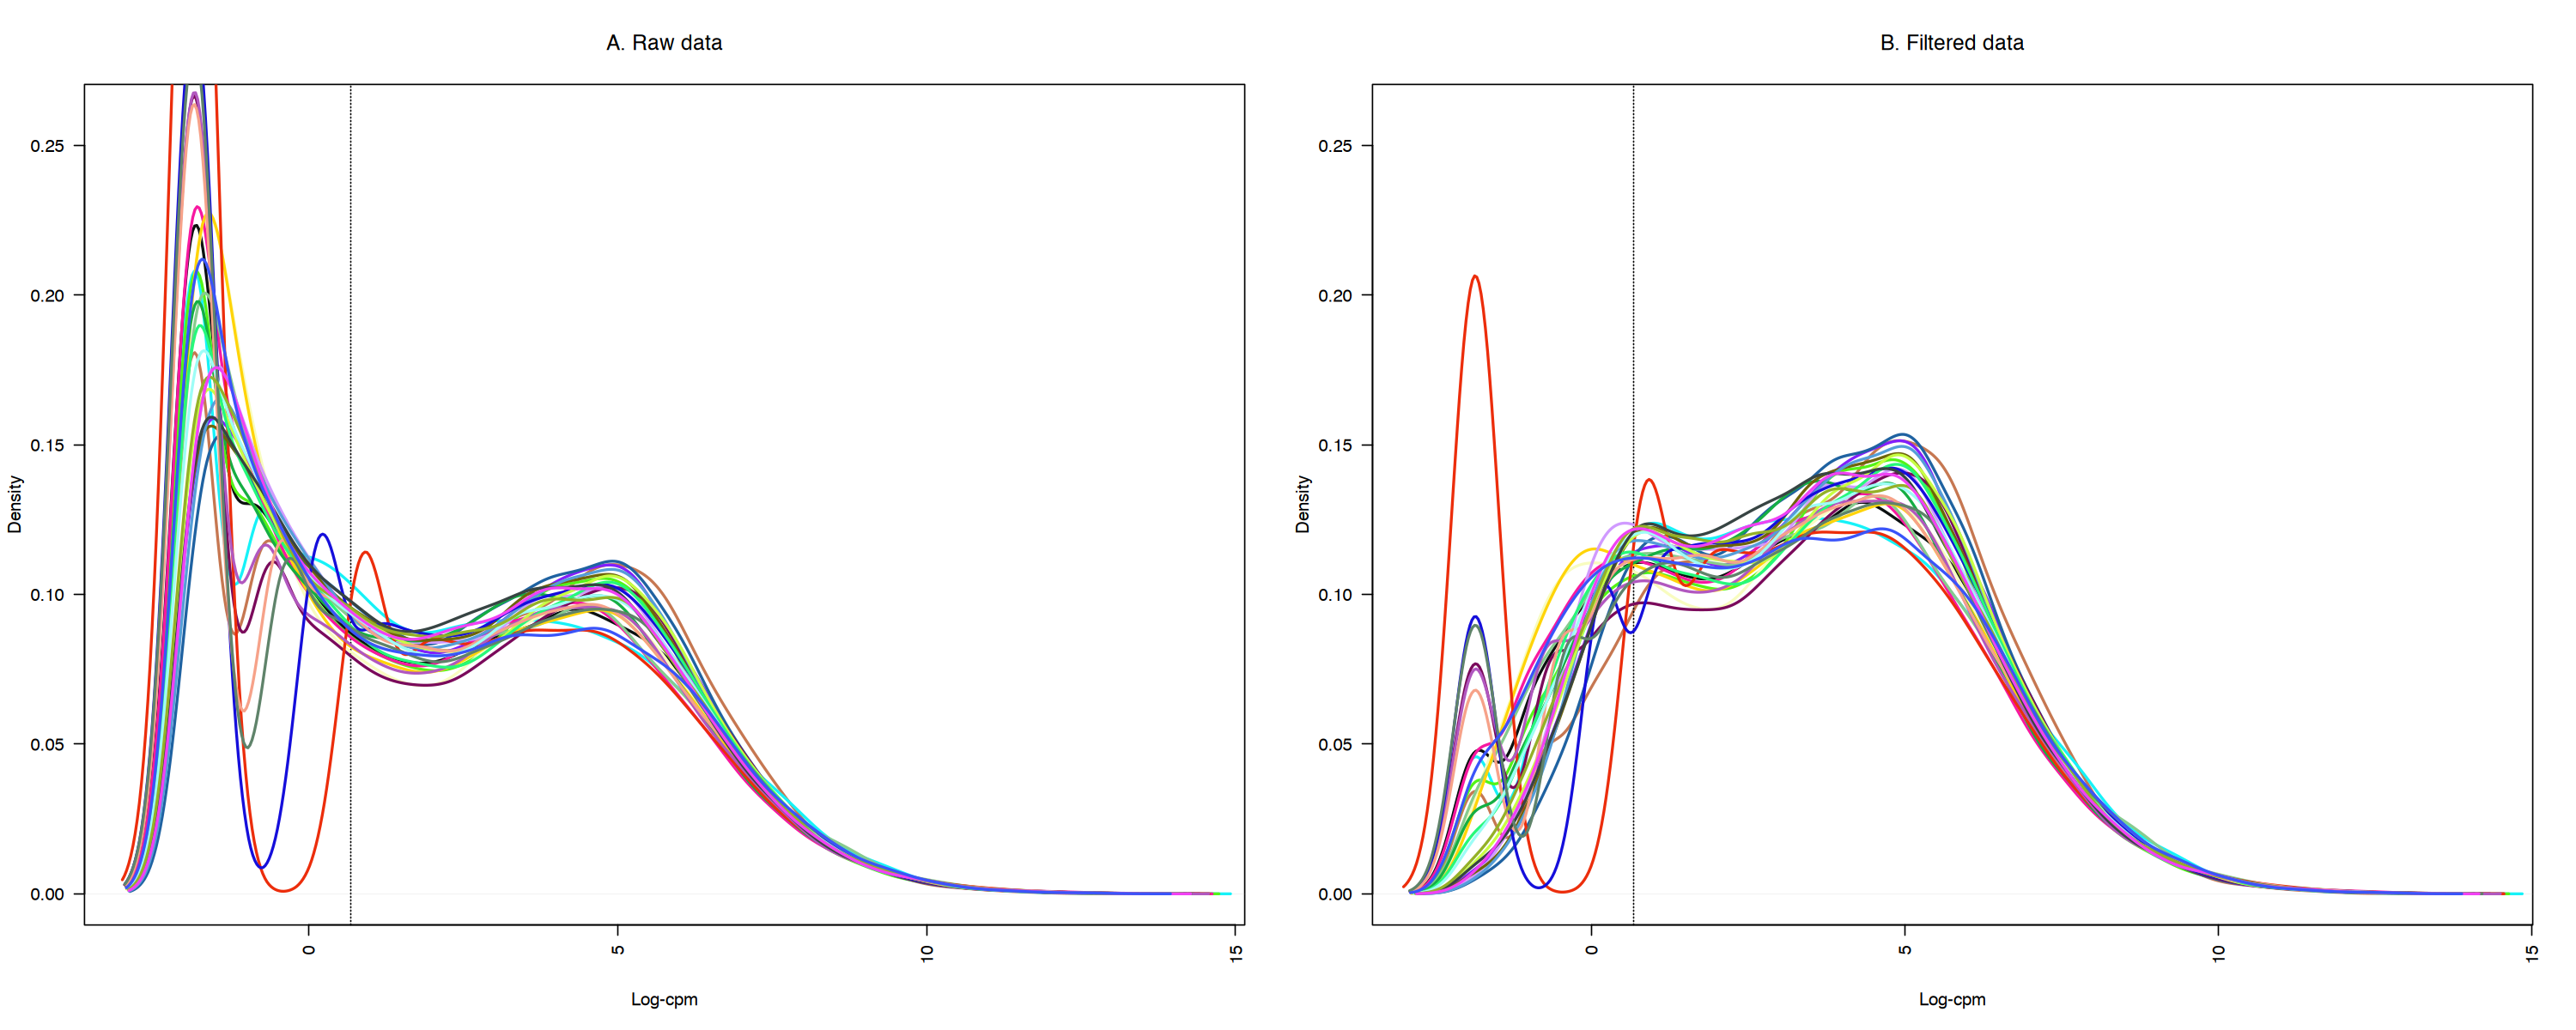

In [18]:
options(repr.plot.width=25, repr.plot.height=10)
lcpm.cutoff <- log2(10/M + 2/L)
nsamples <- ncol(x)
# col <- brewer.pal( nsamples, "Paired")
par(mfrow=c(1,2))
plot(density(lcpm[,1]), col=col[1], lwd=2, ylim=c(0,0.26), las=2, main="", xlab="")
title(main="A. Raw data", xlab="Log-cpm")
abline(v=lcpm.cutoff, lty=3)
for (i in 2:nsamples){
den <- density(lcpm[,i])
lines(den$x, den$y, col=col[i], lwd=2)
}
# legend("right", colnames( counts), text.col=col, bty="n")
lcpm <- cpm(x, log=TRUE)
plot(density(lcpm[,1]), col=col[1], lwd=2, ylim=c(0,0.26), las=2, main="", xlab="")
title(main="B. Filtered data", xlab="Log-cpm")
abline(v=lcpm.cutoff, lty=3)
for (i in 2:nsamples){
den <- density(lcpm[,i])
lines(den$x, den$y, col=col[i], lwd=2)
}
# legend("right", colnames( counts), text.col=col, bty="n", ncol=2)

## Normalising gene expression distributions

In [19]:
x <- calcNormFactors(x, method ="TMM") # "TMM"
x$samples$norm.factors

[1] 1.2710337 0.9842200 0.9445287 1.1013236 0.9686143 0.8852608 1.1764311
 [8] 0.8333477 0.9076171 0.8802161 1.0440451 0.9691320 0.9442944 0.9286374
[15] 1.0761794 1.0951884 0.9261872 1.0955133 1.0729354 0.9956370 0.9641020
[22] 1.0001626 1.0332953 1.0183019 1.0307074 1.0285709 0.9384891

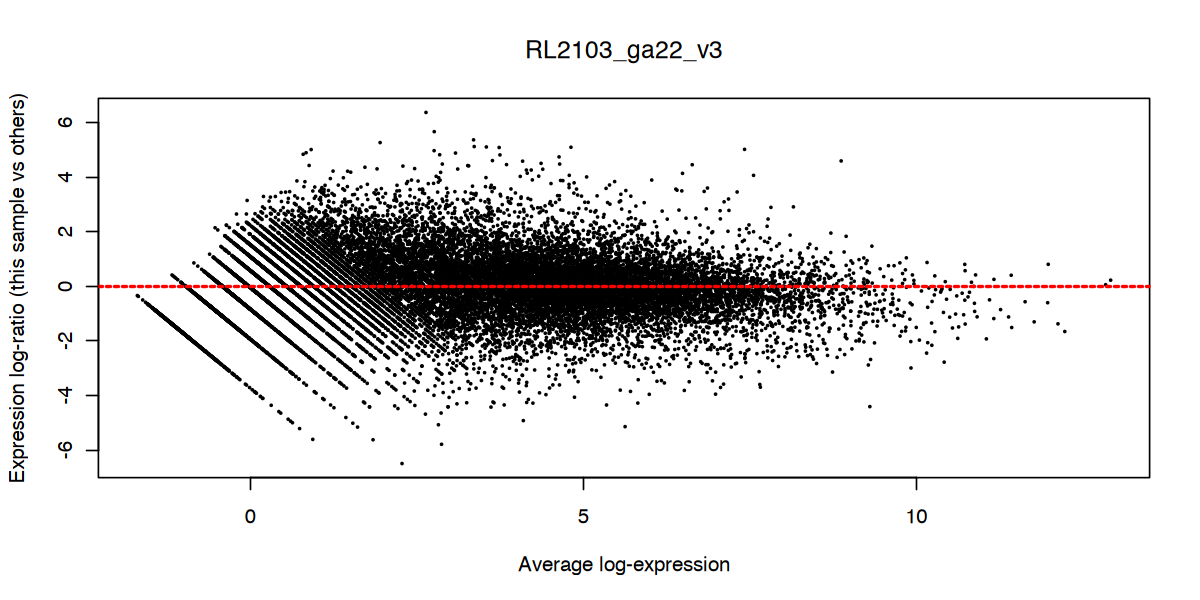

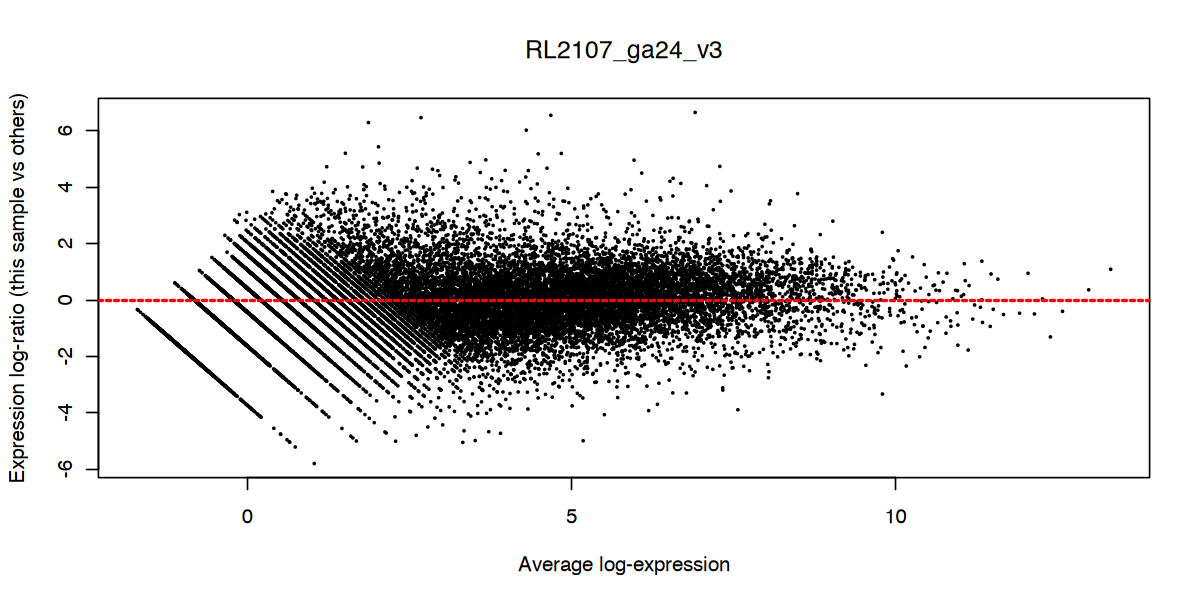

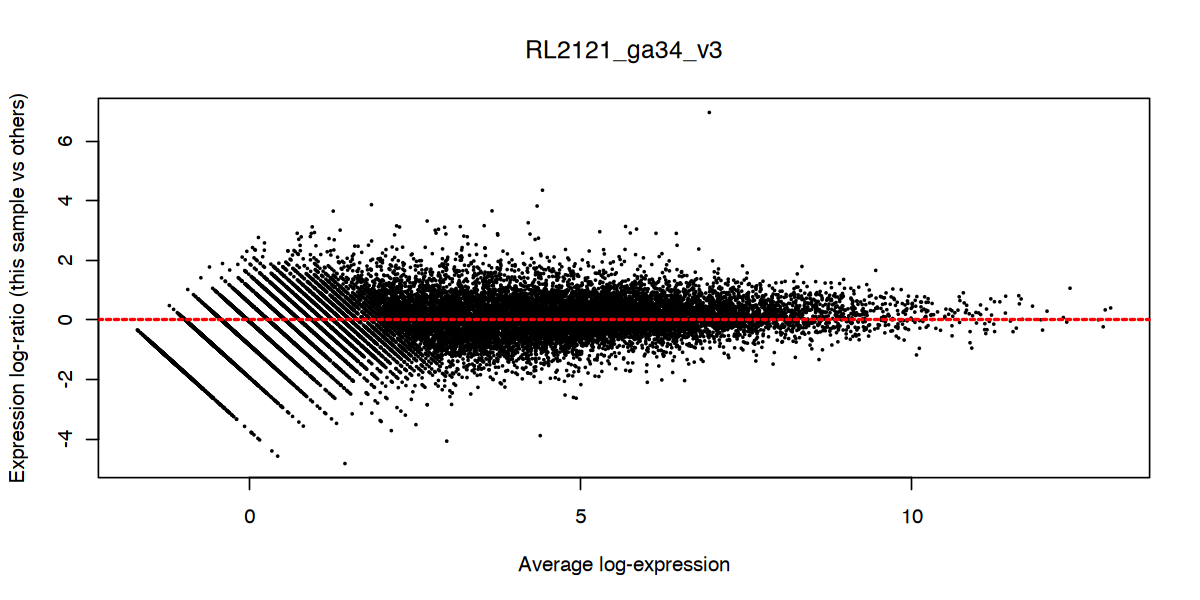

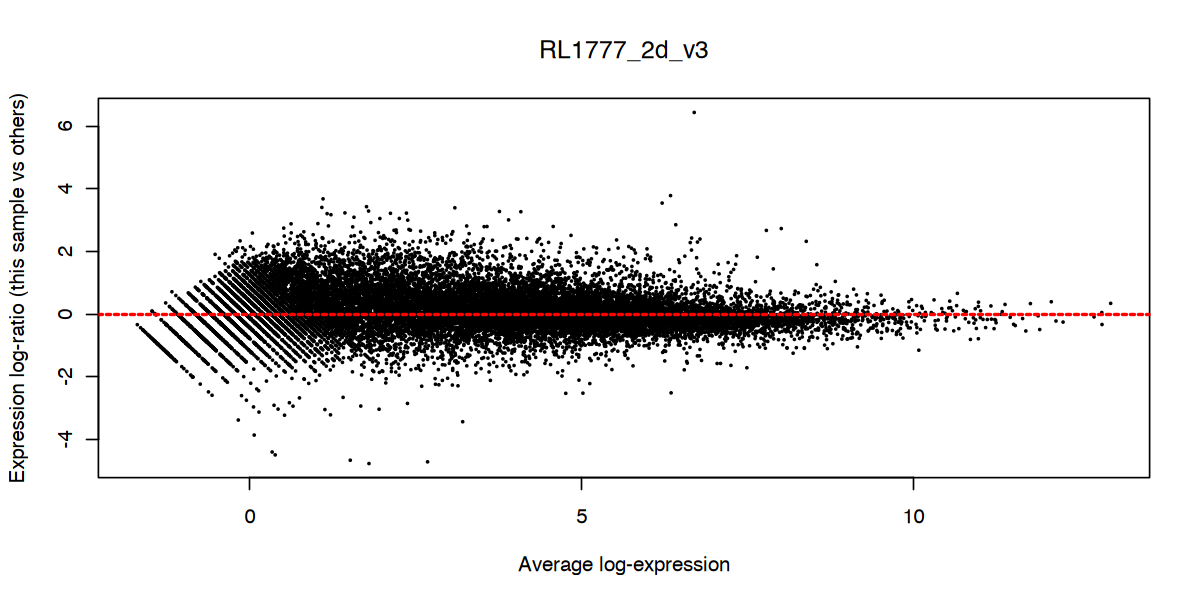

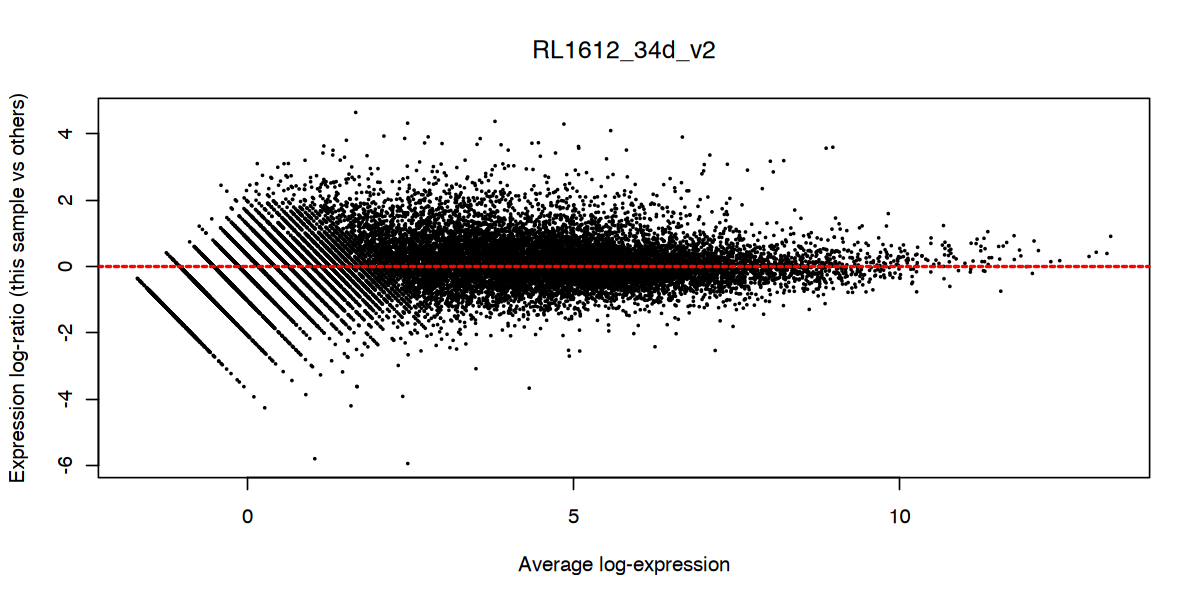

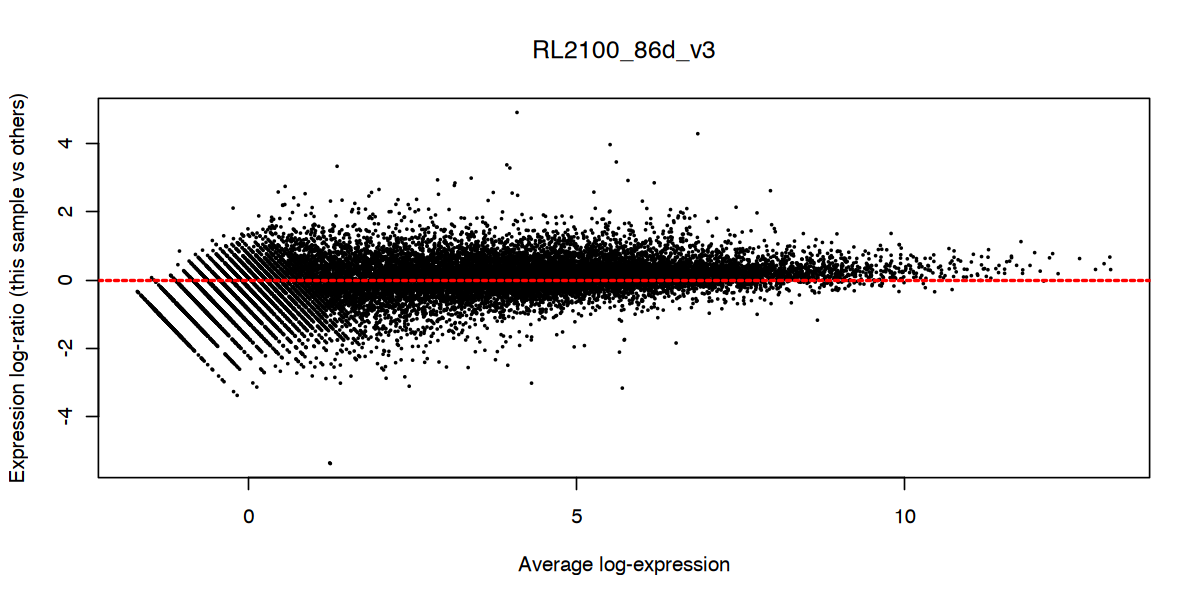

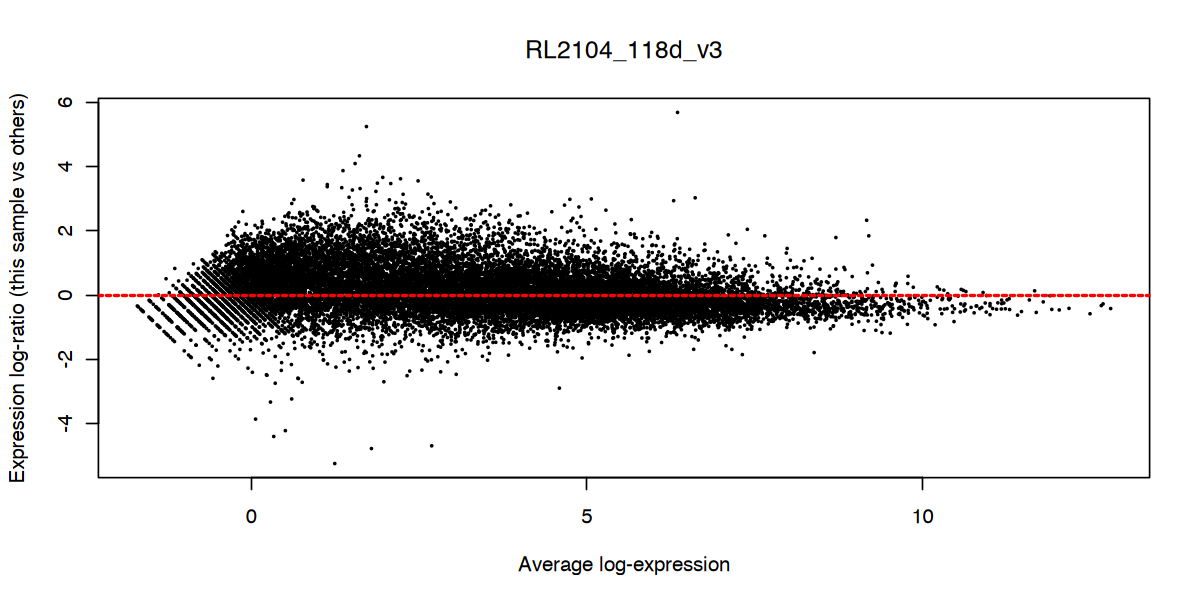

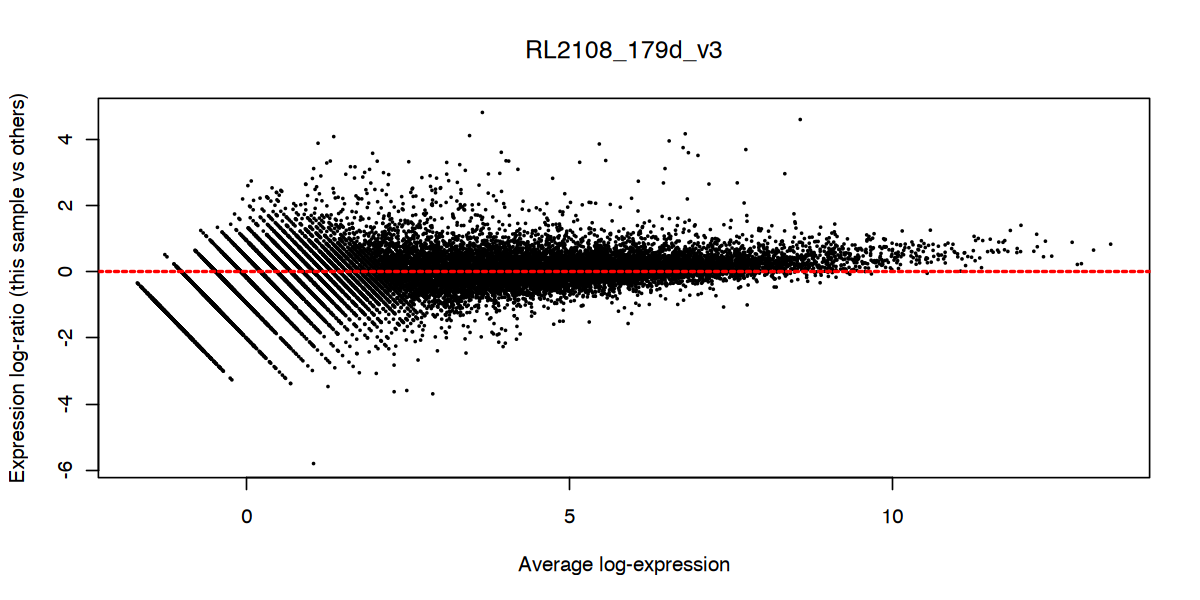

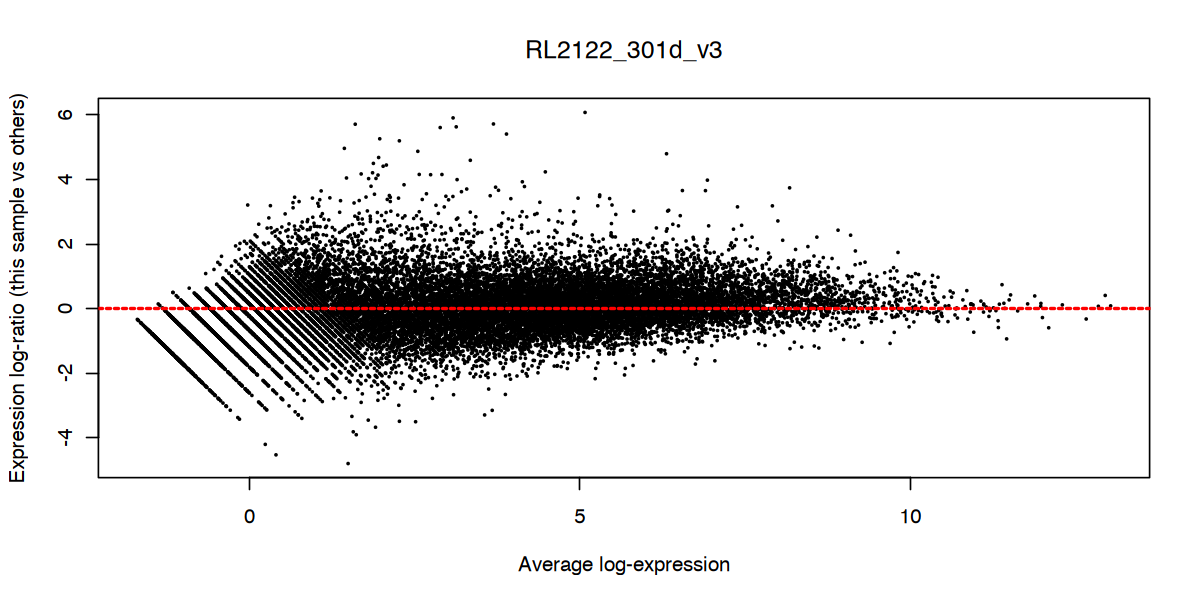

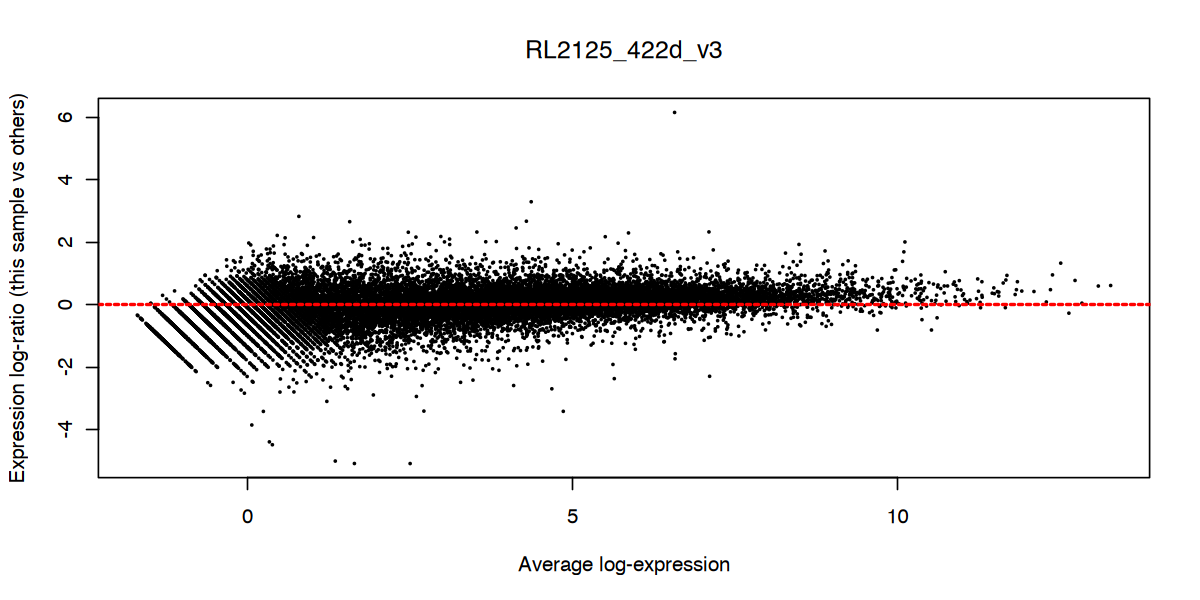

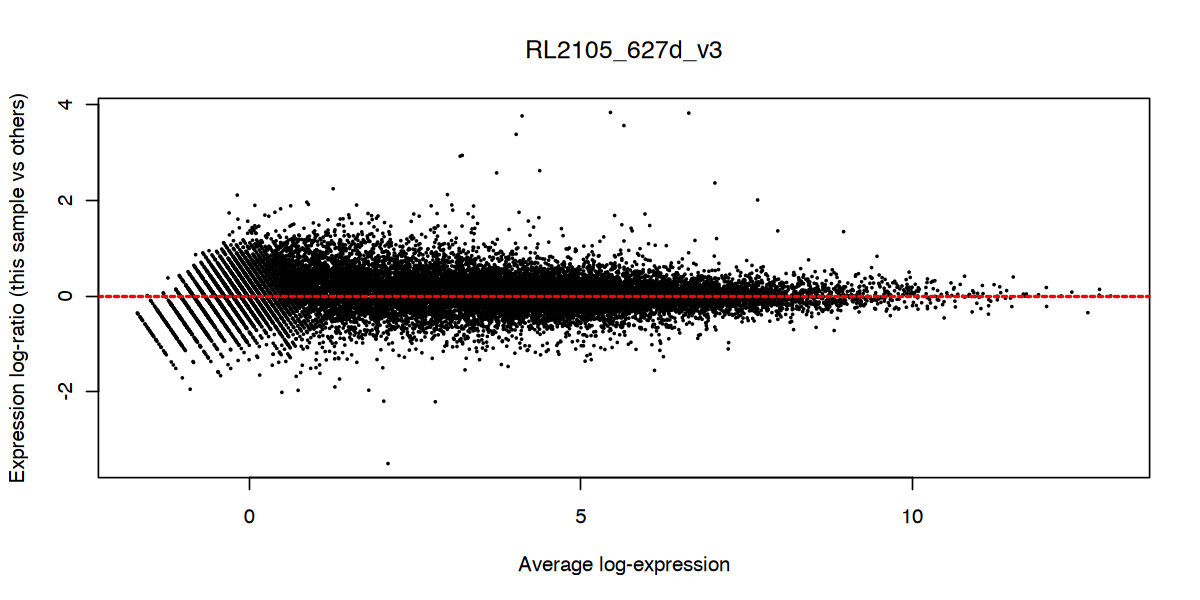

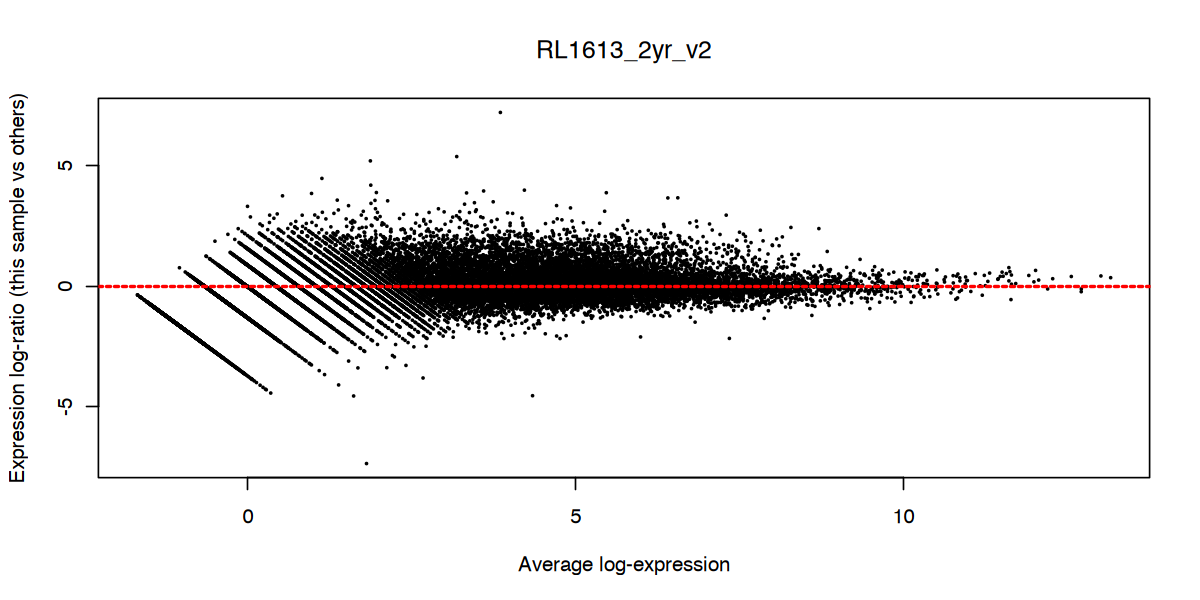

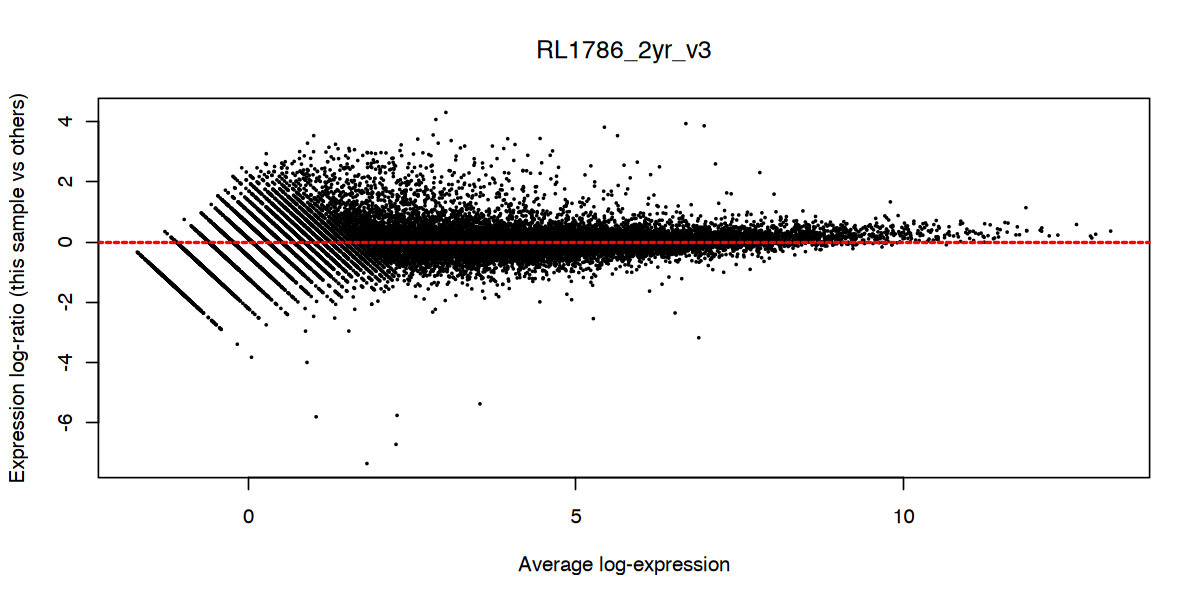

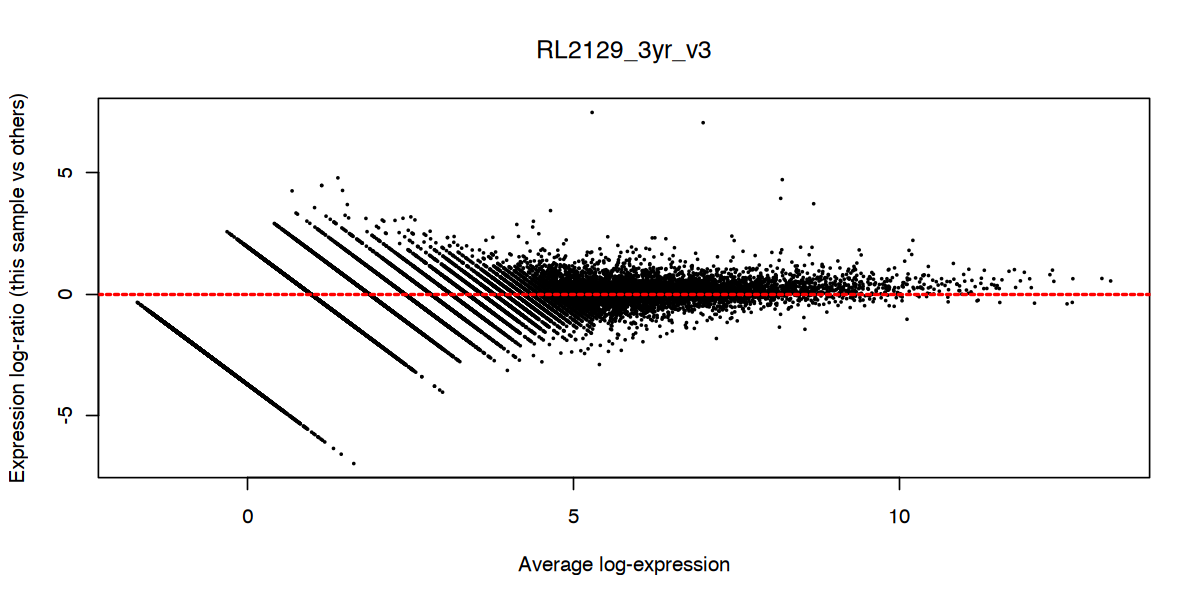

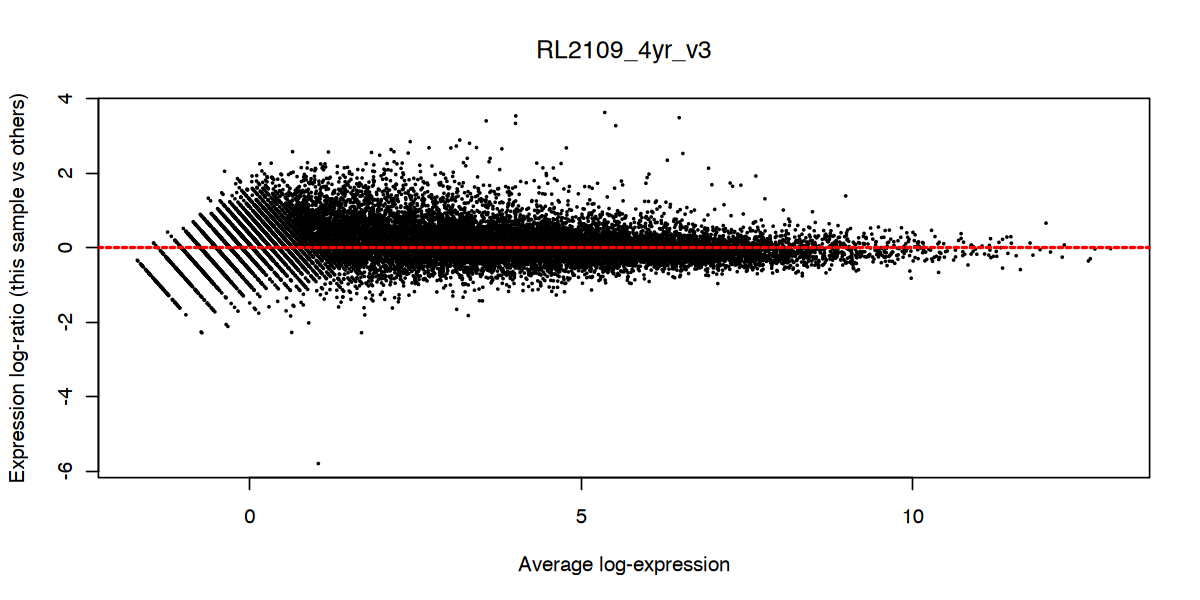

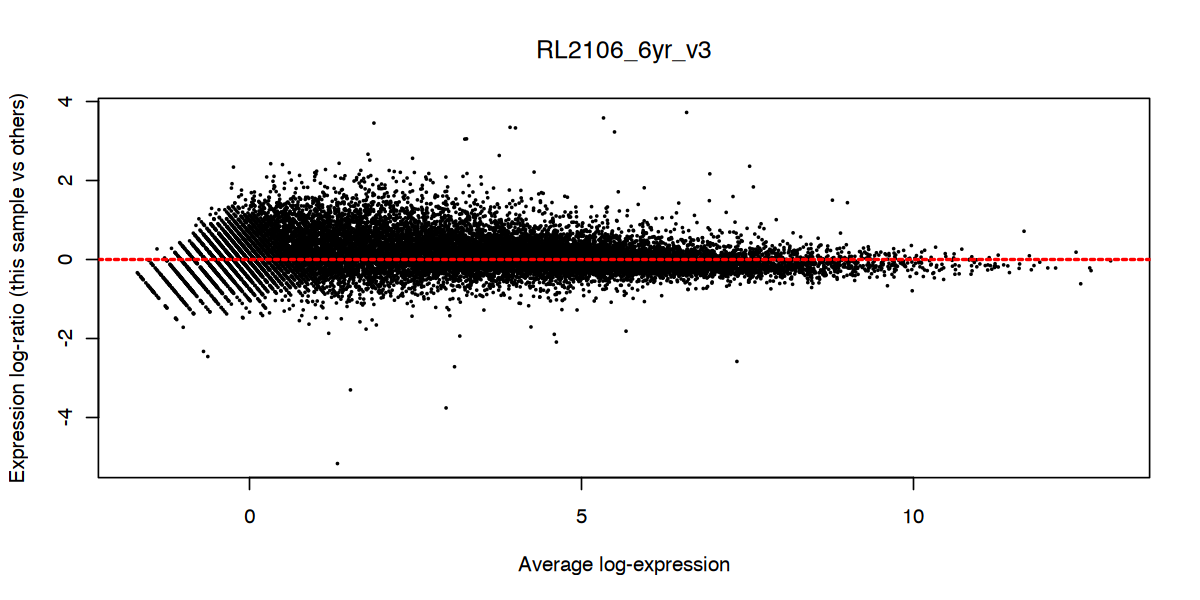

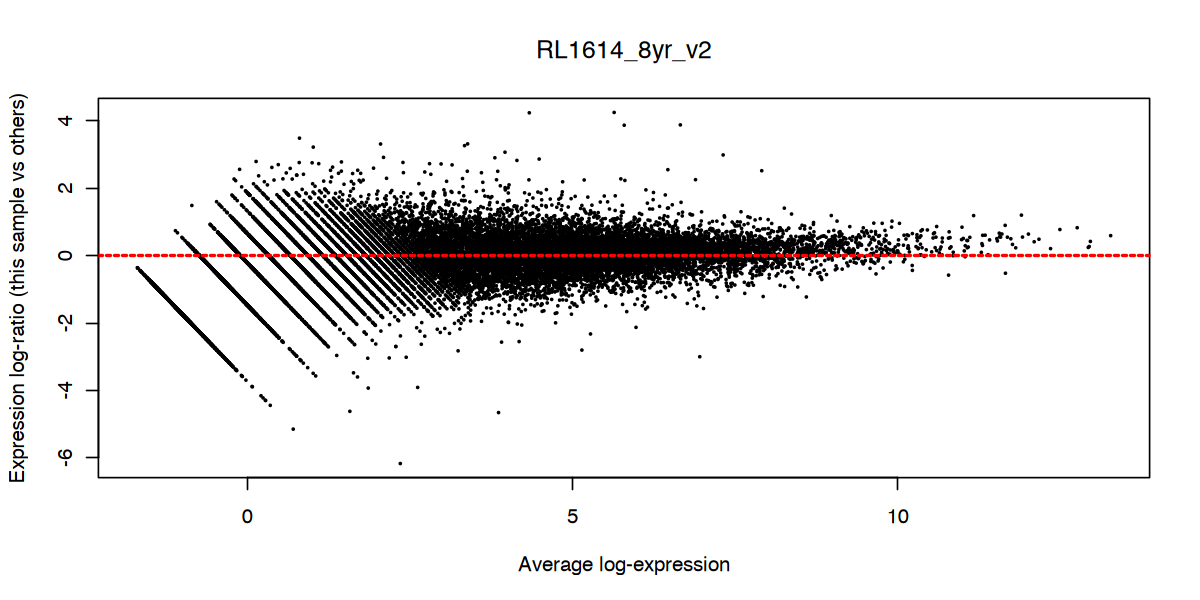

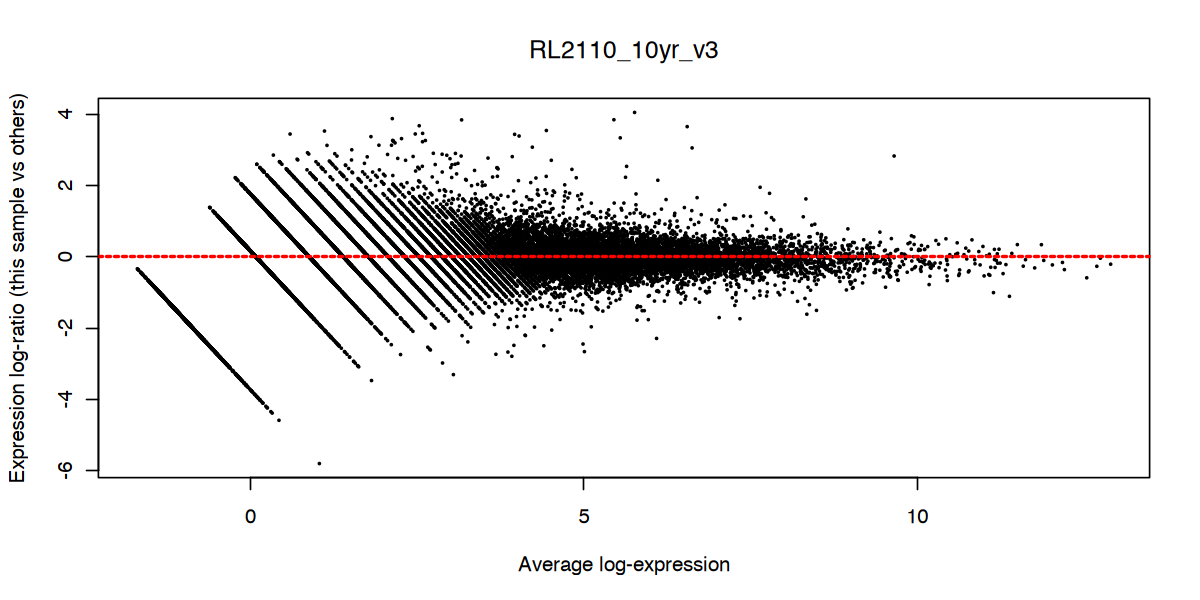

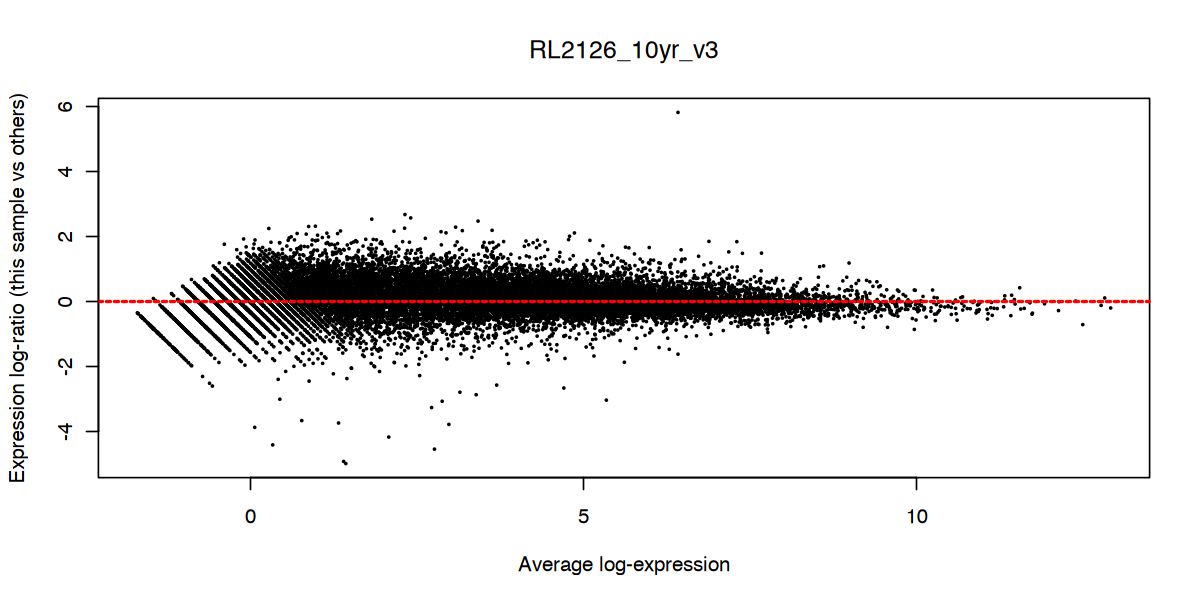

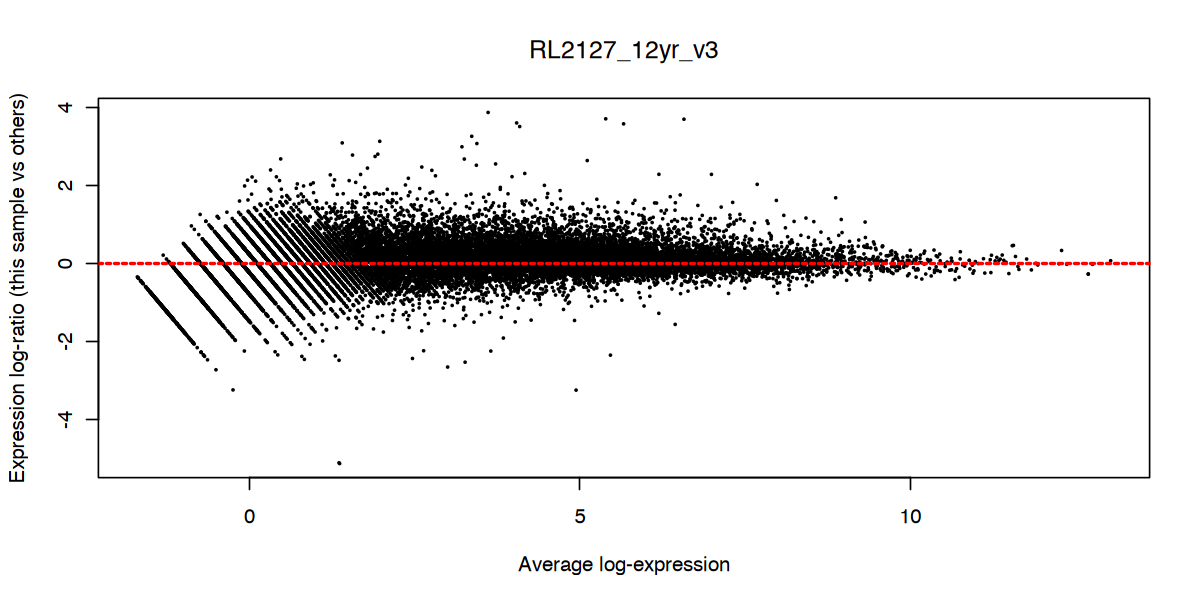

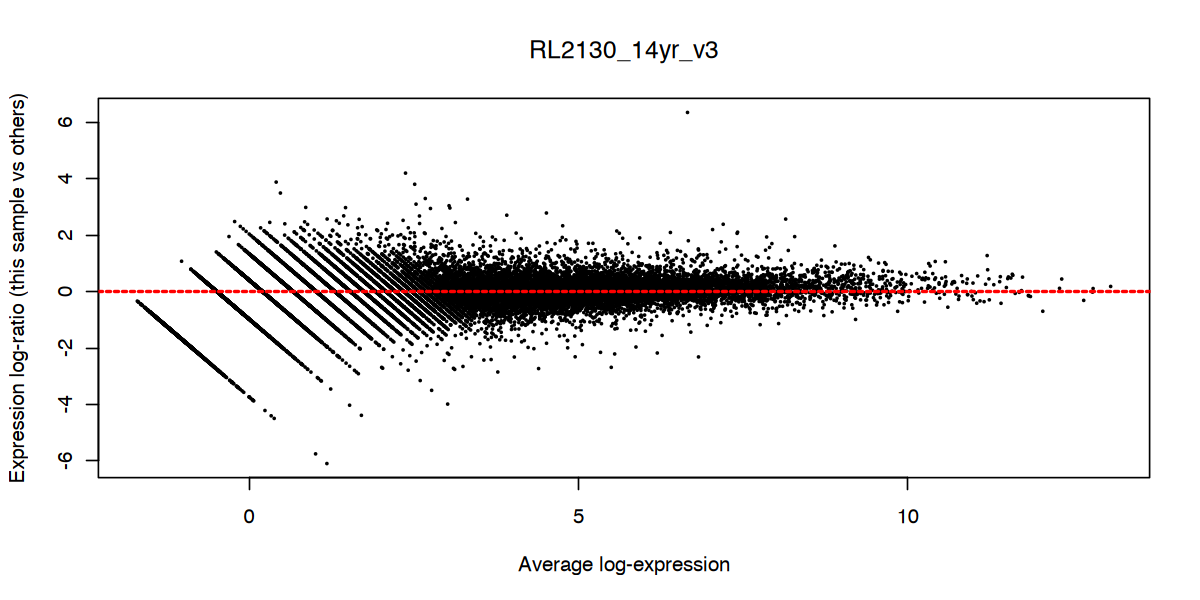

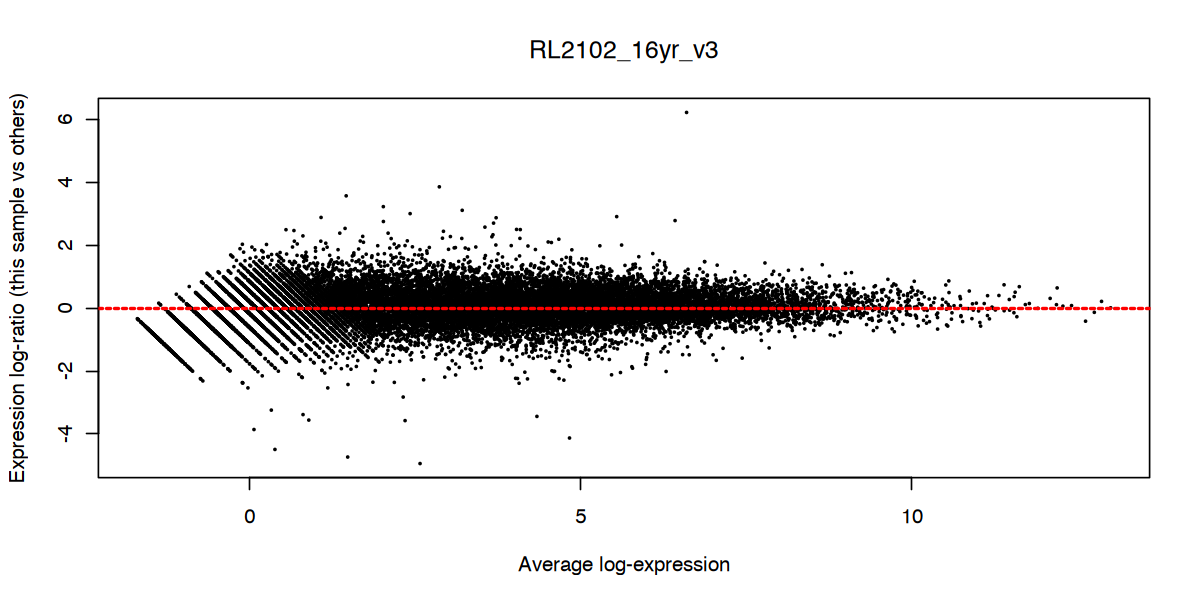

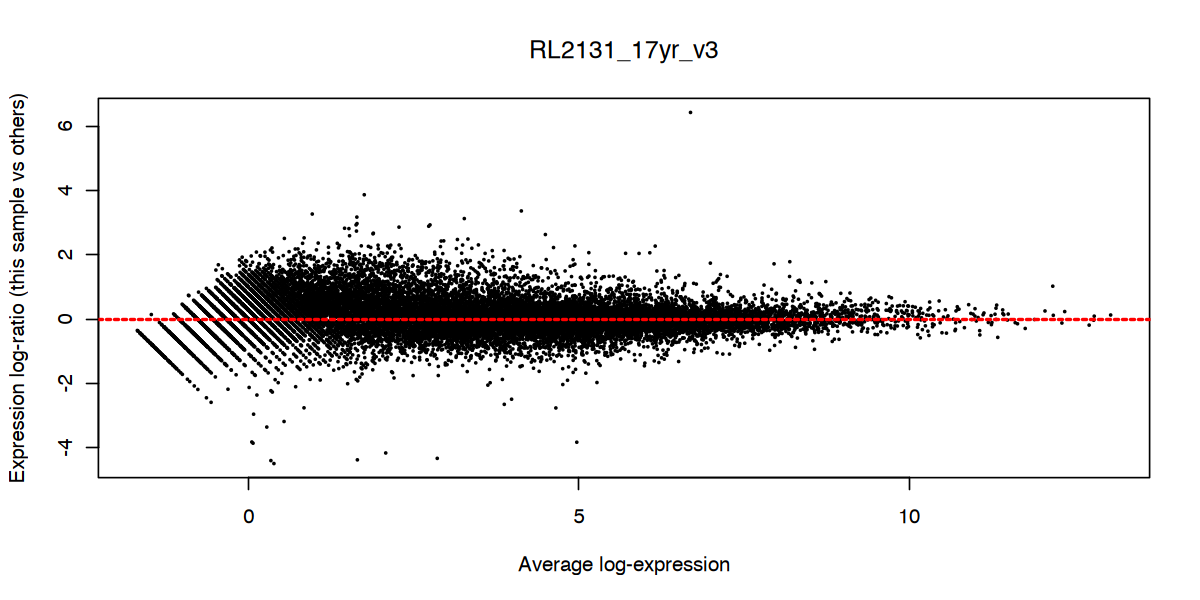

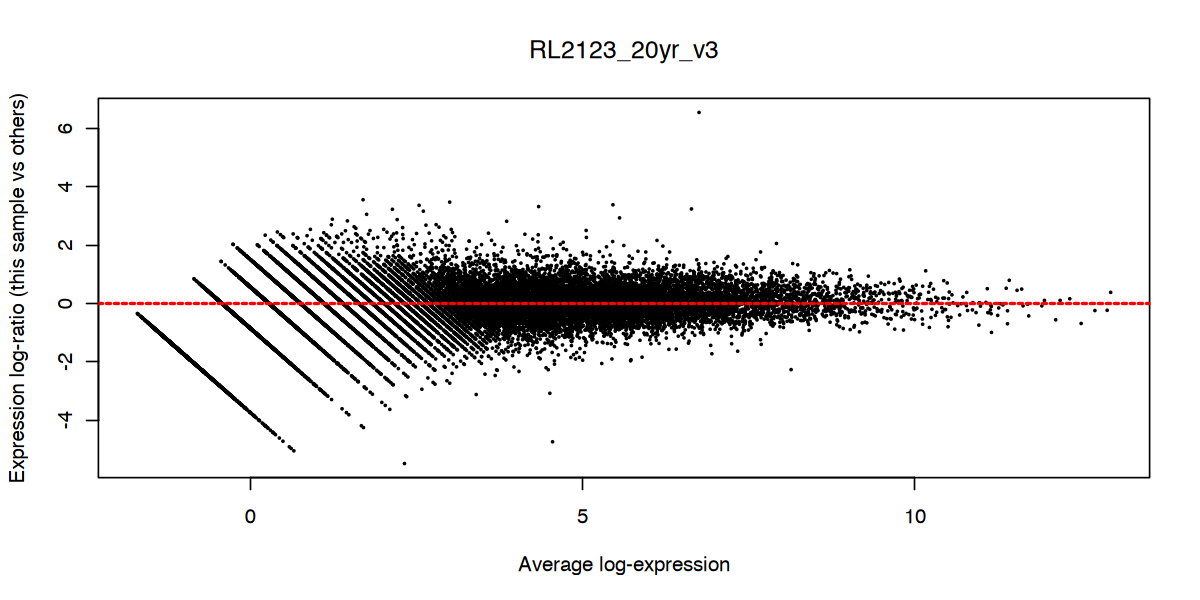

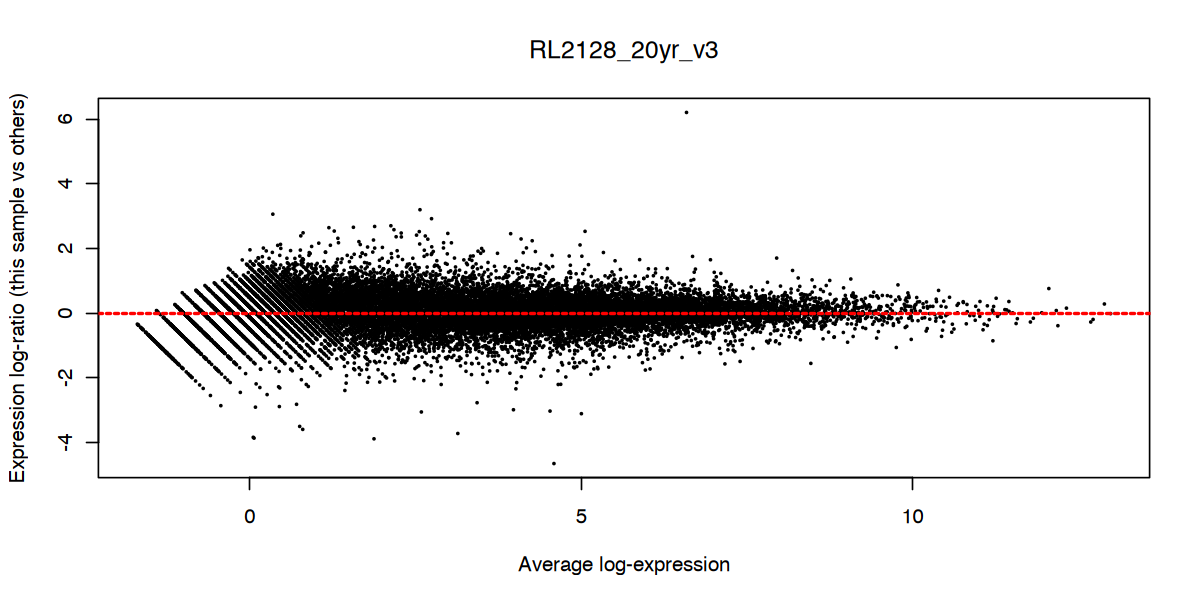

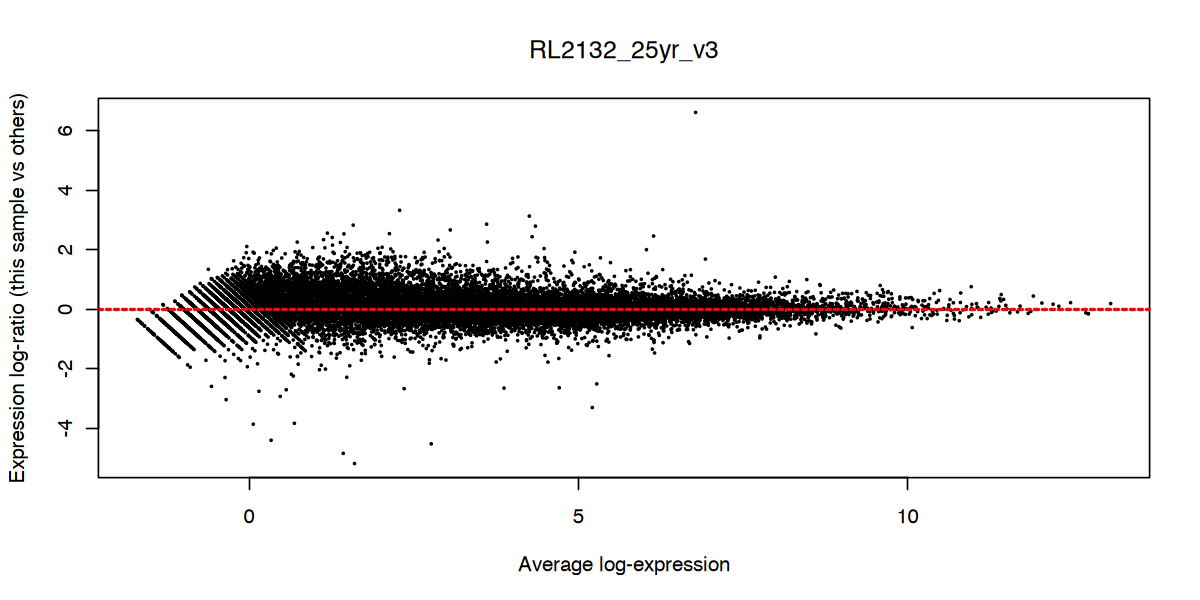

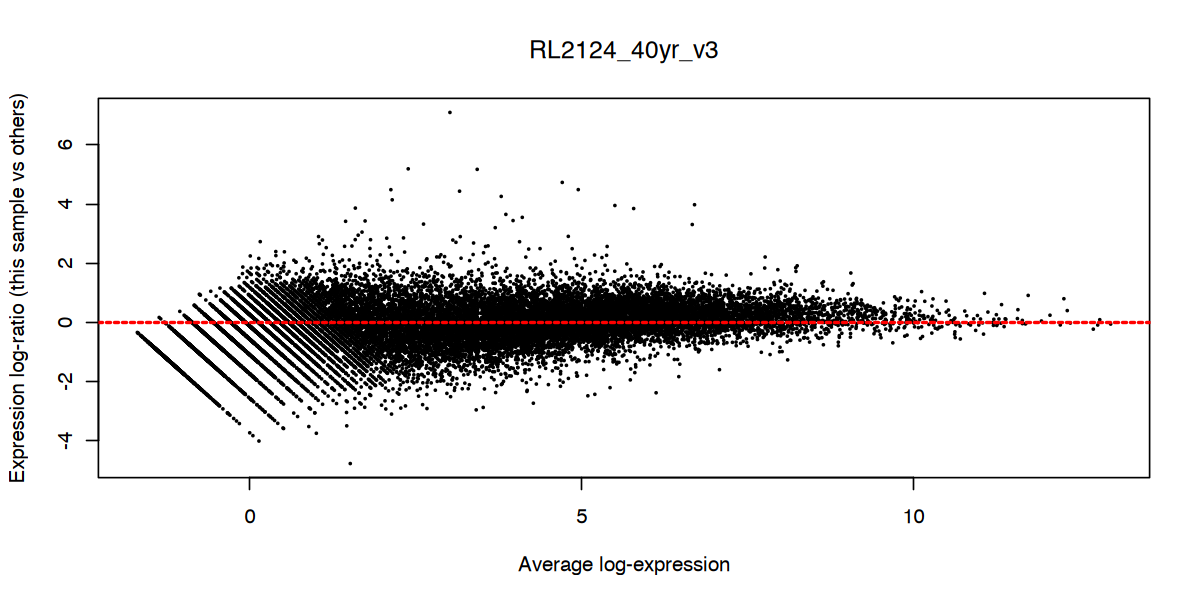

In [20]:
chem <- as.factor( x$samples$chem)
sex  <- as.factor( x$samples$Sex)
design <- model.matrix(~0+group+chem+sex)
y <- estimateDisp( x, design, robust=TRUE)
options(repr.plot.width=10, repr.plot.height=5)
for (itr in 1:length(colnames(x))){
    plotMD( cpm(y, log=TRUE), column=itr)
    abline(h=0, col="red", lty=2, lwd=2)
}

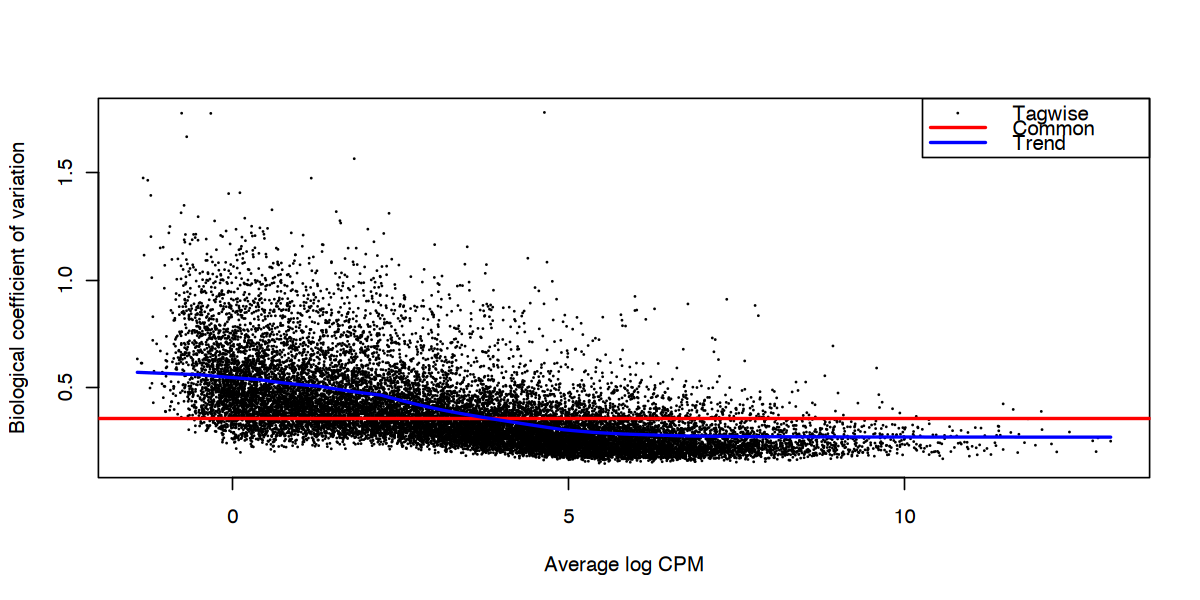

In [21]:
plotBCV(y)

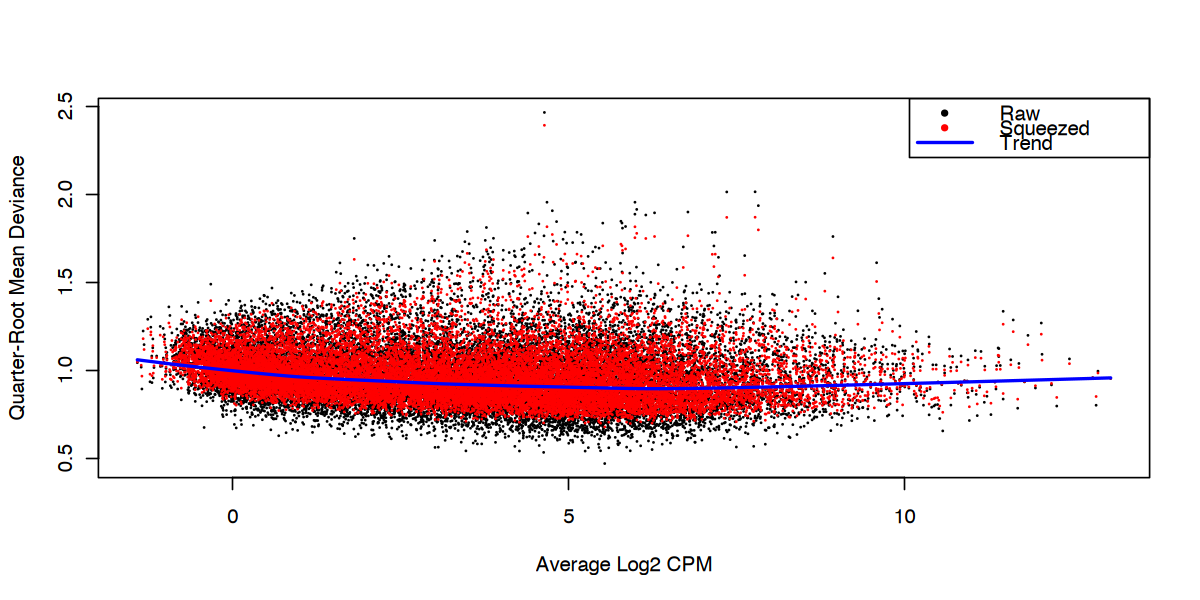

In [22]:
fit <- glmQLFit( y, design, robust=TRUE)
plotQLDisp(fit)

### Look for potential confounders

In [23]:
lcpm <- cpm(x, log=TRUE)

In [24]:
plot_mds_feats <- function( feat, title, mds=lcpm, cc="Set1") {
    # get colors for each level of factor
    fact <- feat
    levels( fact) <- brewer.pal( nlevels( fact), cc)
    char_vec <- as.character( fact)
    # set number of rows and columns for plots
    n_cols <- 3
    n_rows <- 1 
    n_plts <- n_cols*n_rows
    par( mfrow=c(n_rows,n_cols))
    # set figure size
    options( repr.plot.width=8*n_cols, repr.plot.height=8*n_rows)
    for (itr in seq(1,6,2)){
        plotMDS( mds, top=1000, labels=feat, col=char_vec, dim=c(itr,itr+1), cex=2.5)
        title(main=title)
    }
}

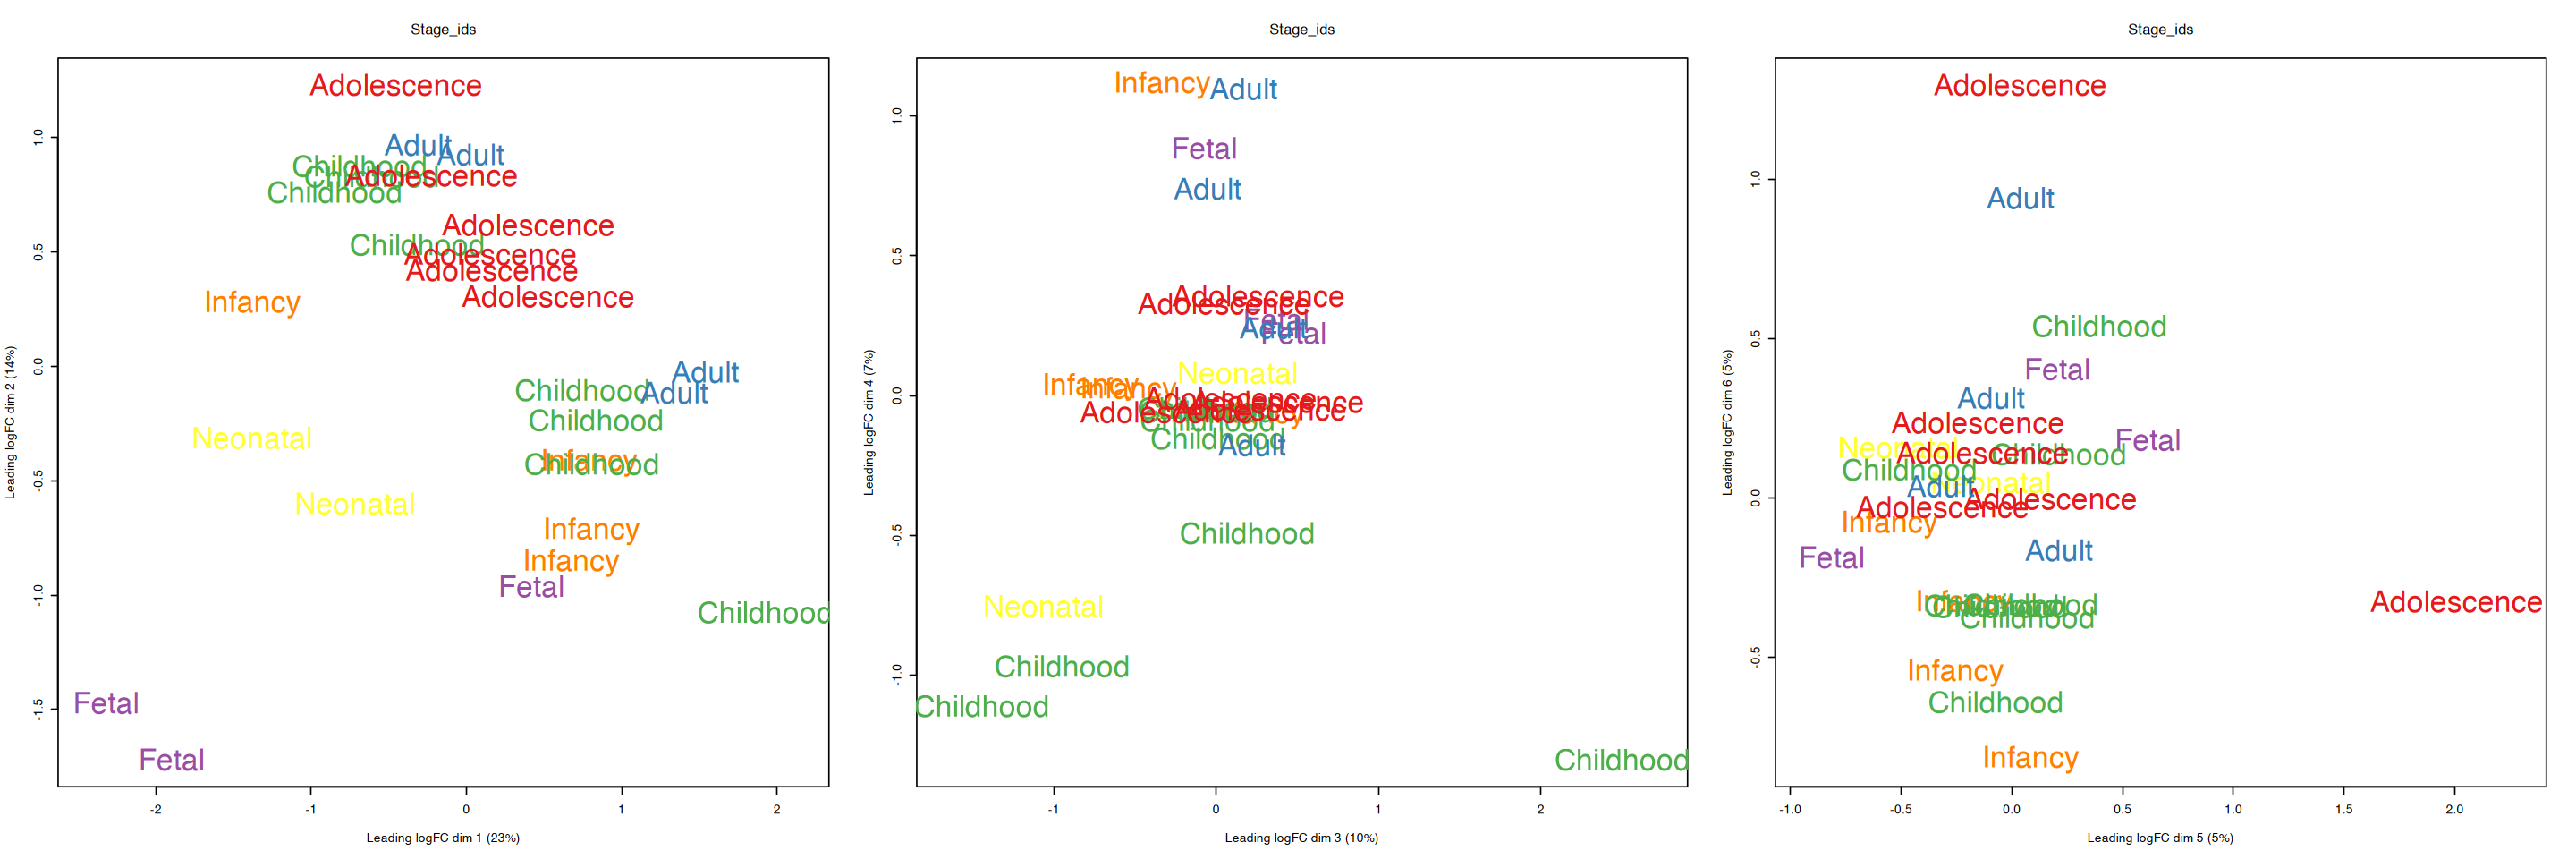

In [25]:
plot_mds_feats( feat=x$samples$group, title="Stage_ids")

In [26]:
feats_oi

[1] "chem"             "Sex"              "Race"             "PMI"             
[5] "Brain.Regions."   "Oxygen.No.Oxygen" "Collection_year"  "Library.Prep.Lot"
[9] "ICD.10.category"

Warning message in brewer.pal(nlevels(fact), cc):
“minimal value for n is 3, returning requested palette with 3 different levels
”


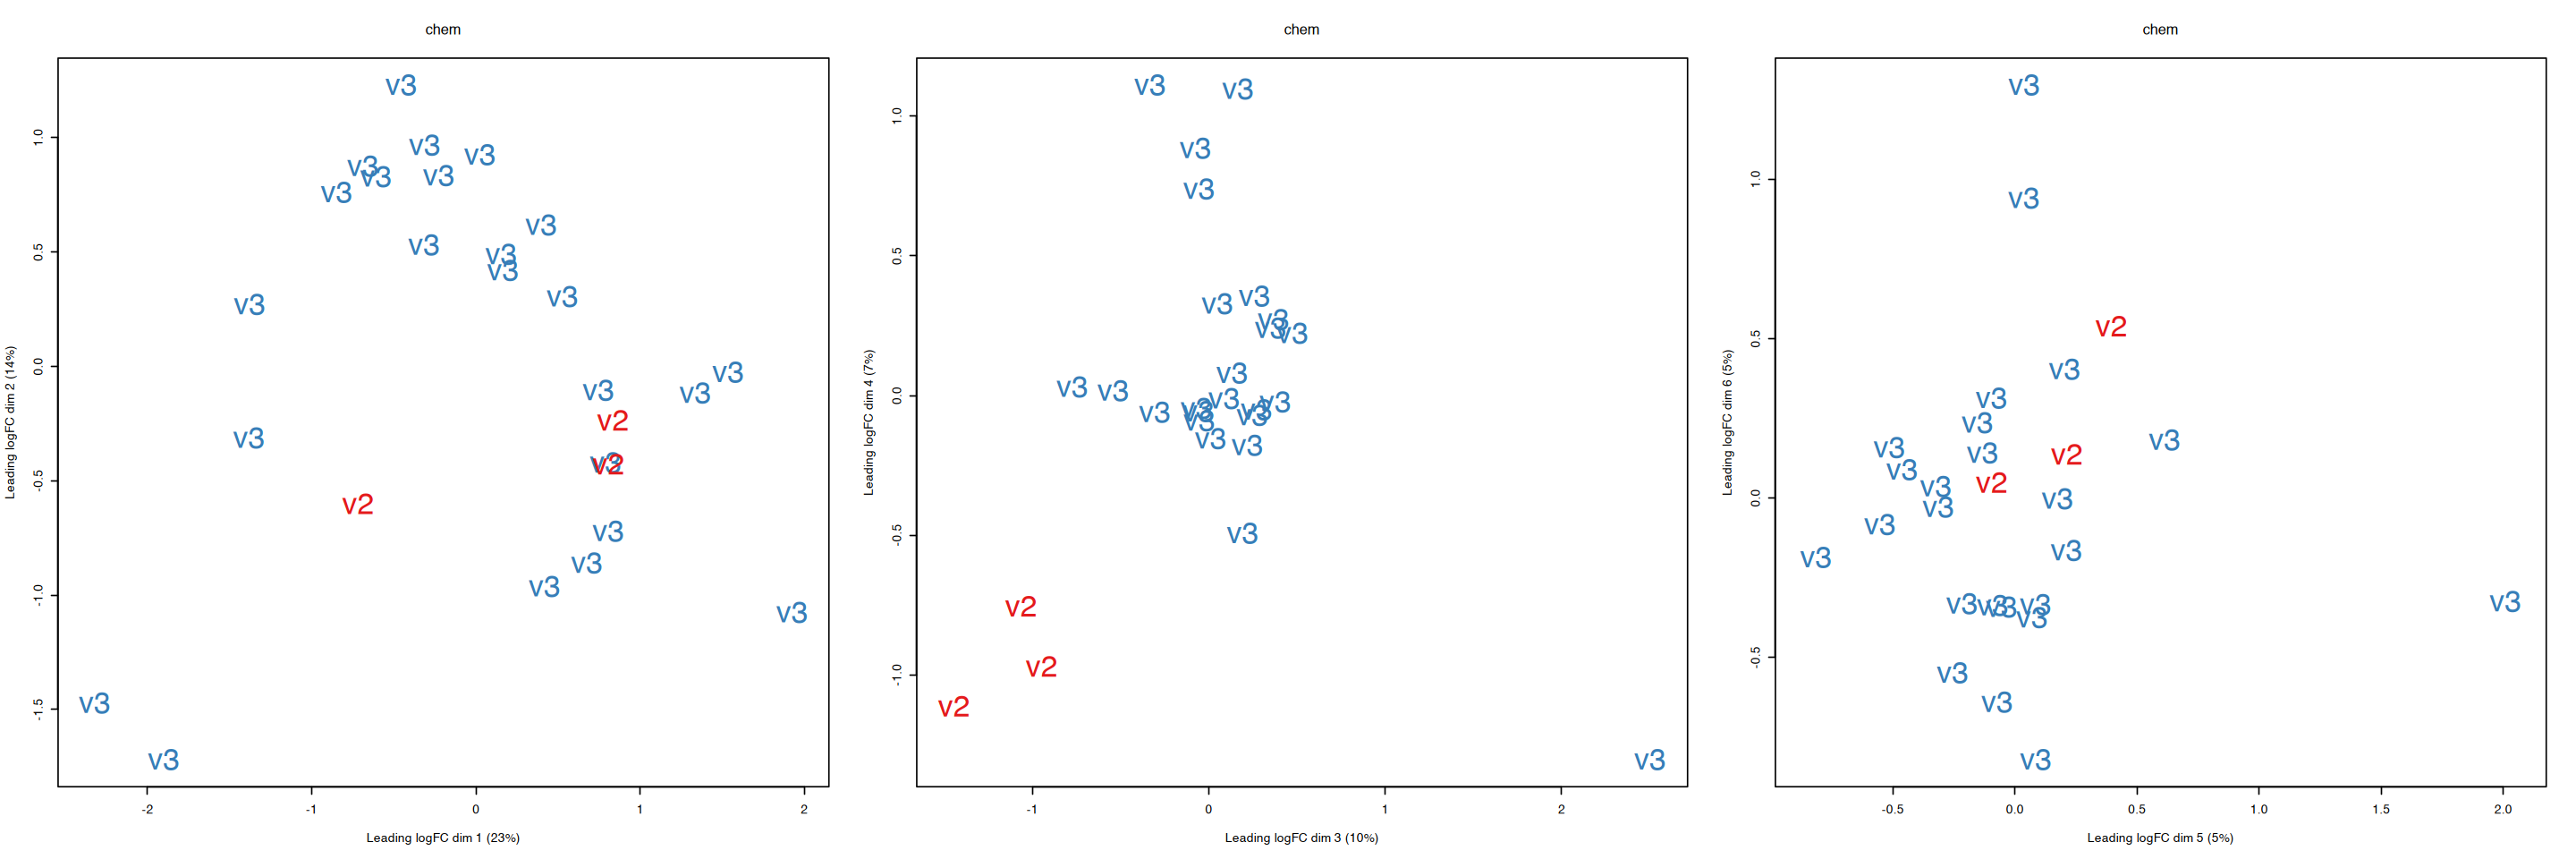

In [27]:
fact = as.factor( x$samples[,"chem"])
plot_mds_feats( feat=fact, title="chem")

Warning message in brewer.pal(nlevels(fact), cc):
“minimal value for n is 3, returning requested palette with 3 different levels
”


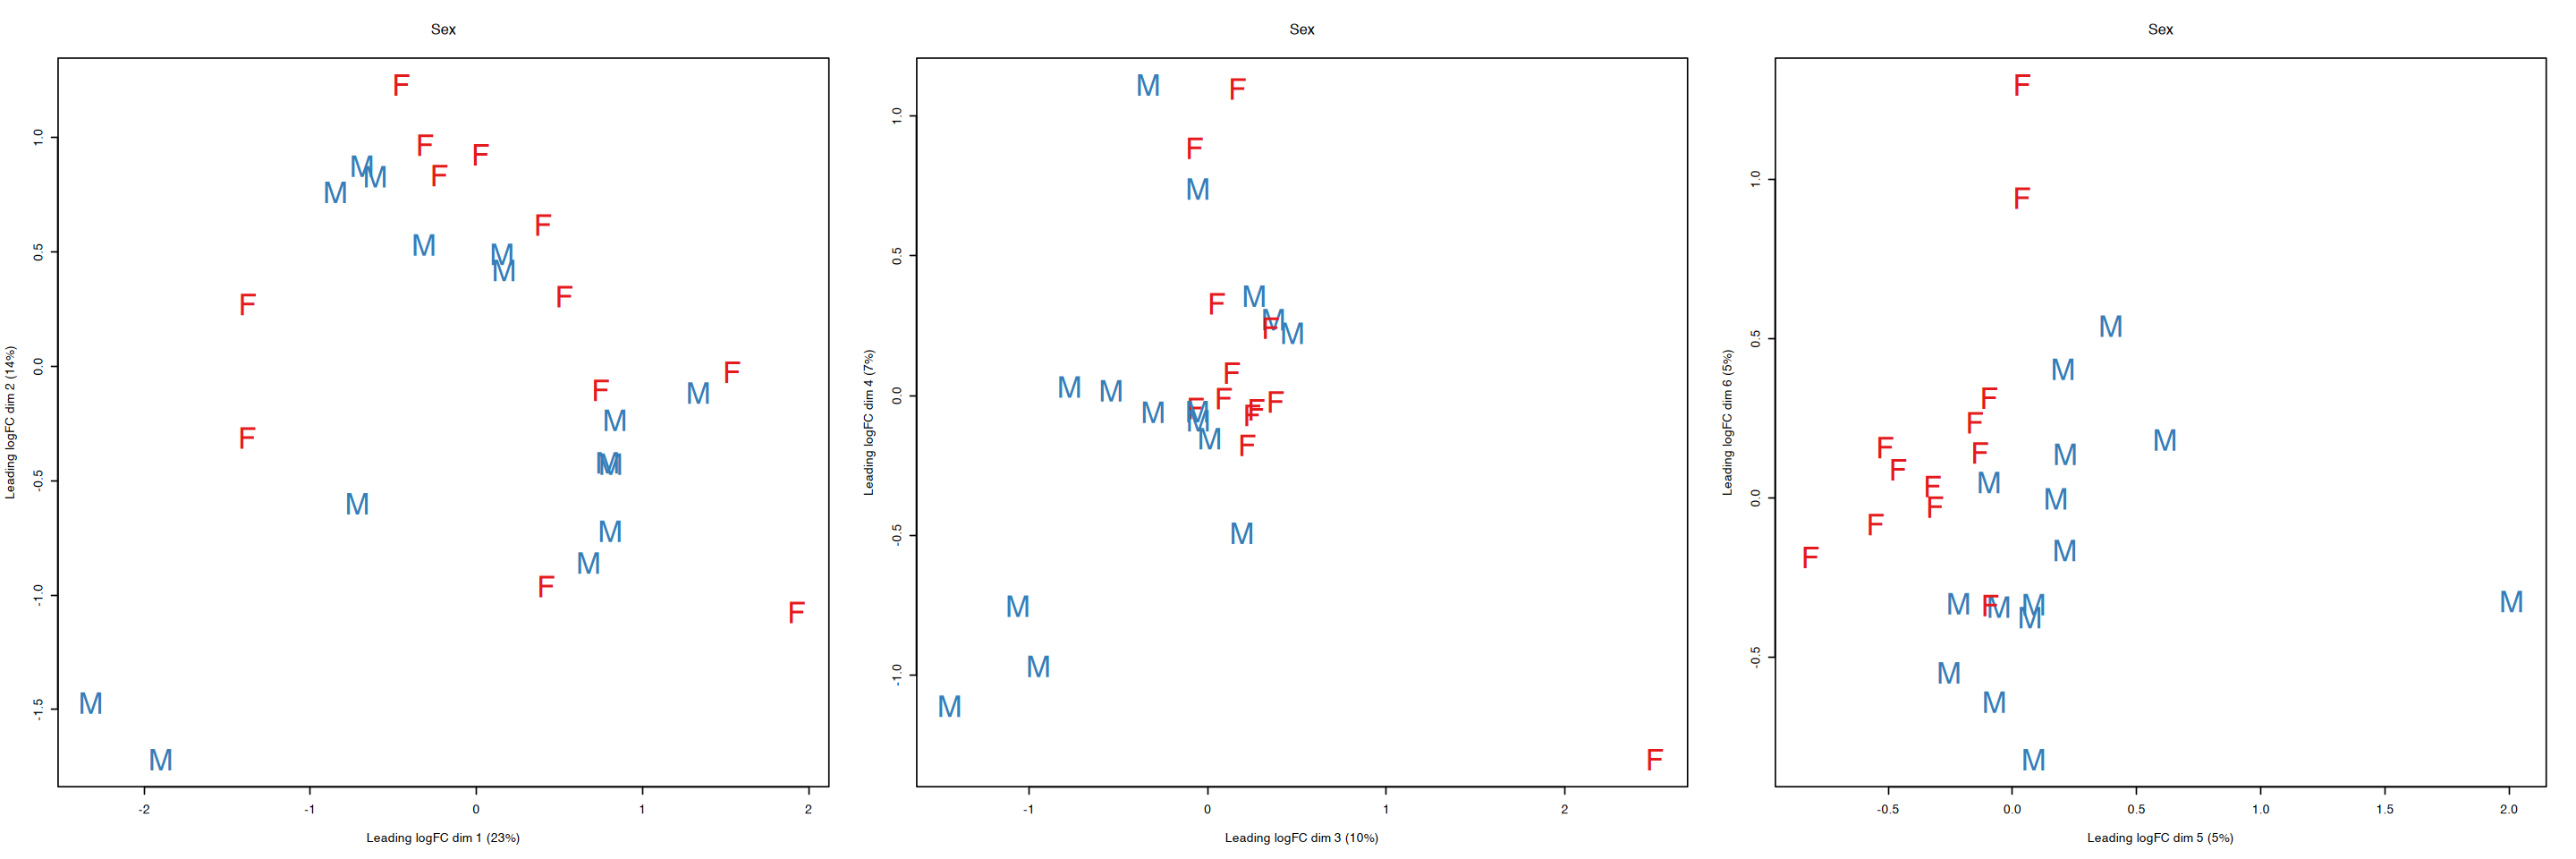

In [28]:
fact = as.factor( x$samples[,"Sex"])
plot_mds_feats( feat=fact, title="Sex")

Warning message in brewer.pal(nlevels(fact), cc):
“minimal value for n is 3, returning requested palette with 3 different levels
”


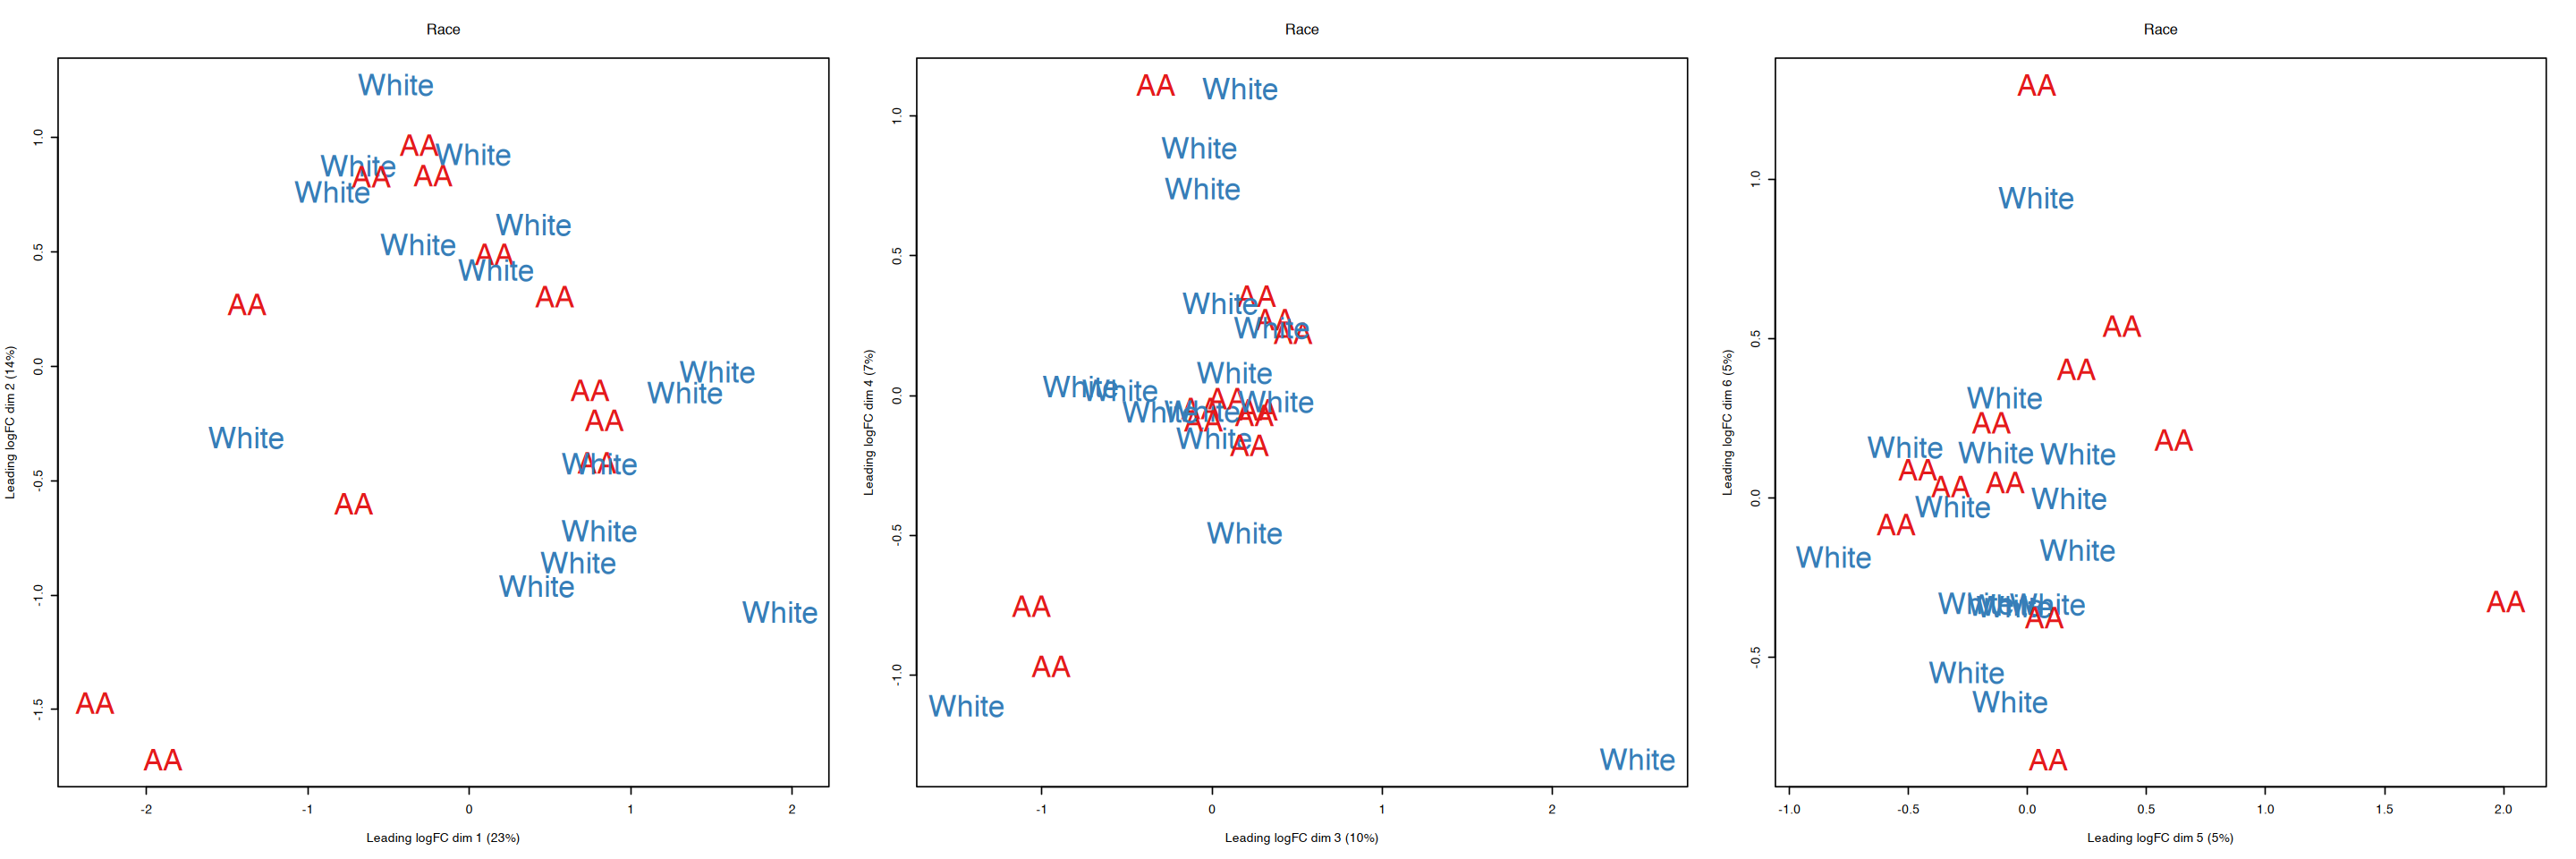

In [29]:
fact = as.factor( x$samples[,"Race"])
plot_mds_feats( feat=fact, title="Race")

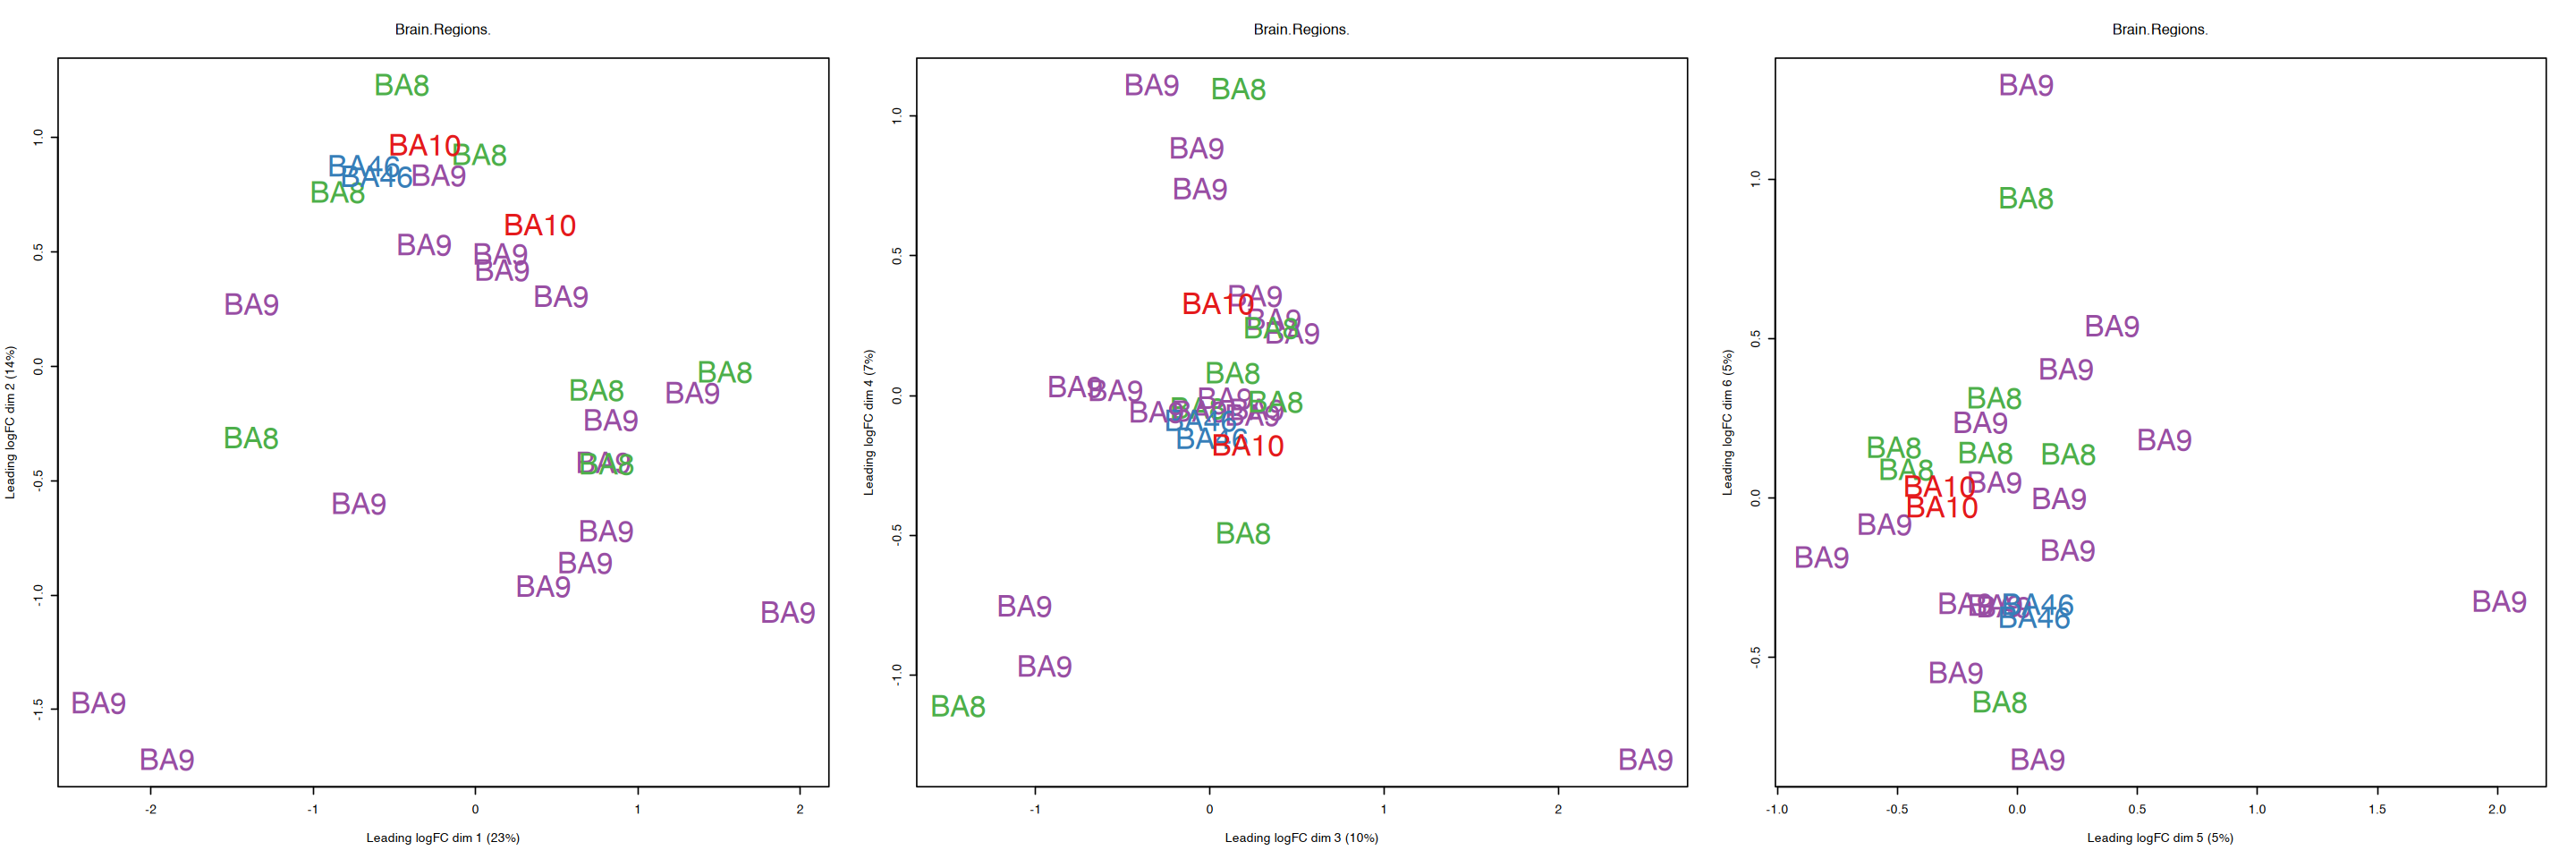

In [30]:
fact = as.factor( x$samples[,"Brain.Regions."])
plot_mds_feats( feat=fact, title="Brain.Regions.")

In [31]:
feats_oi

[1] "chem"             "Sex"              "Race"             "PMI"             
[5] "Brain.Regions."   "Oxygen.No.Oxygen" "Collection_year"  "Library.Prep.Lot"
[9] "ICD.10.category"

In [32]:
plot_mds_feats_noCol <- function( feat, title, mds=lcpm, cc="Set1") {
    # get colors for each level of factor
    fact <- feat
    n_cols <- 3
    n_rows <- 1 
    n_plts <- n_cols*n_rows
    par( mfrow=c(n_rows,n_cols))
    # set figure size
    options( repr.plot.width=8*n_cols, repr.plot.height=8*n_rows)
    for (itr in seq(1,6,2)){
        plotMDS( mds, top=1000, labels=feat, dim=c(itr,itr+1), cex=2)
        title(main=title)
    }
}

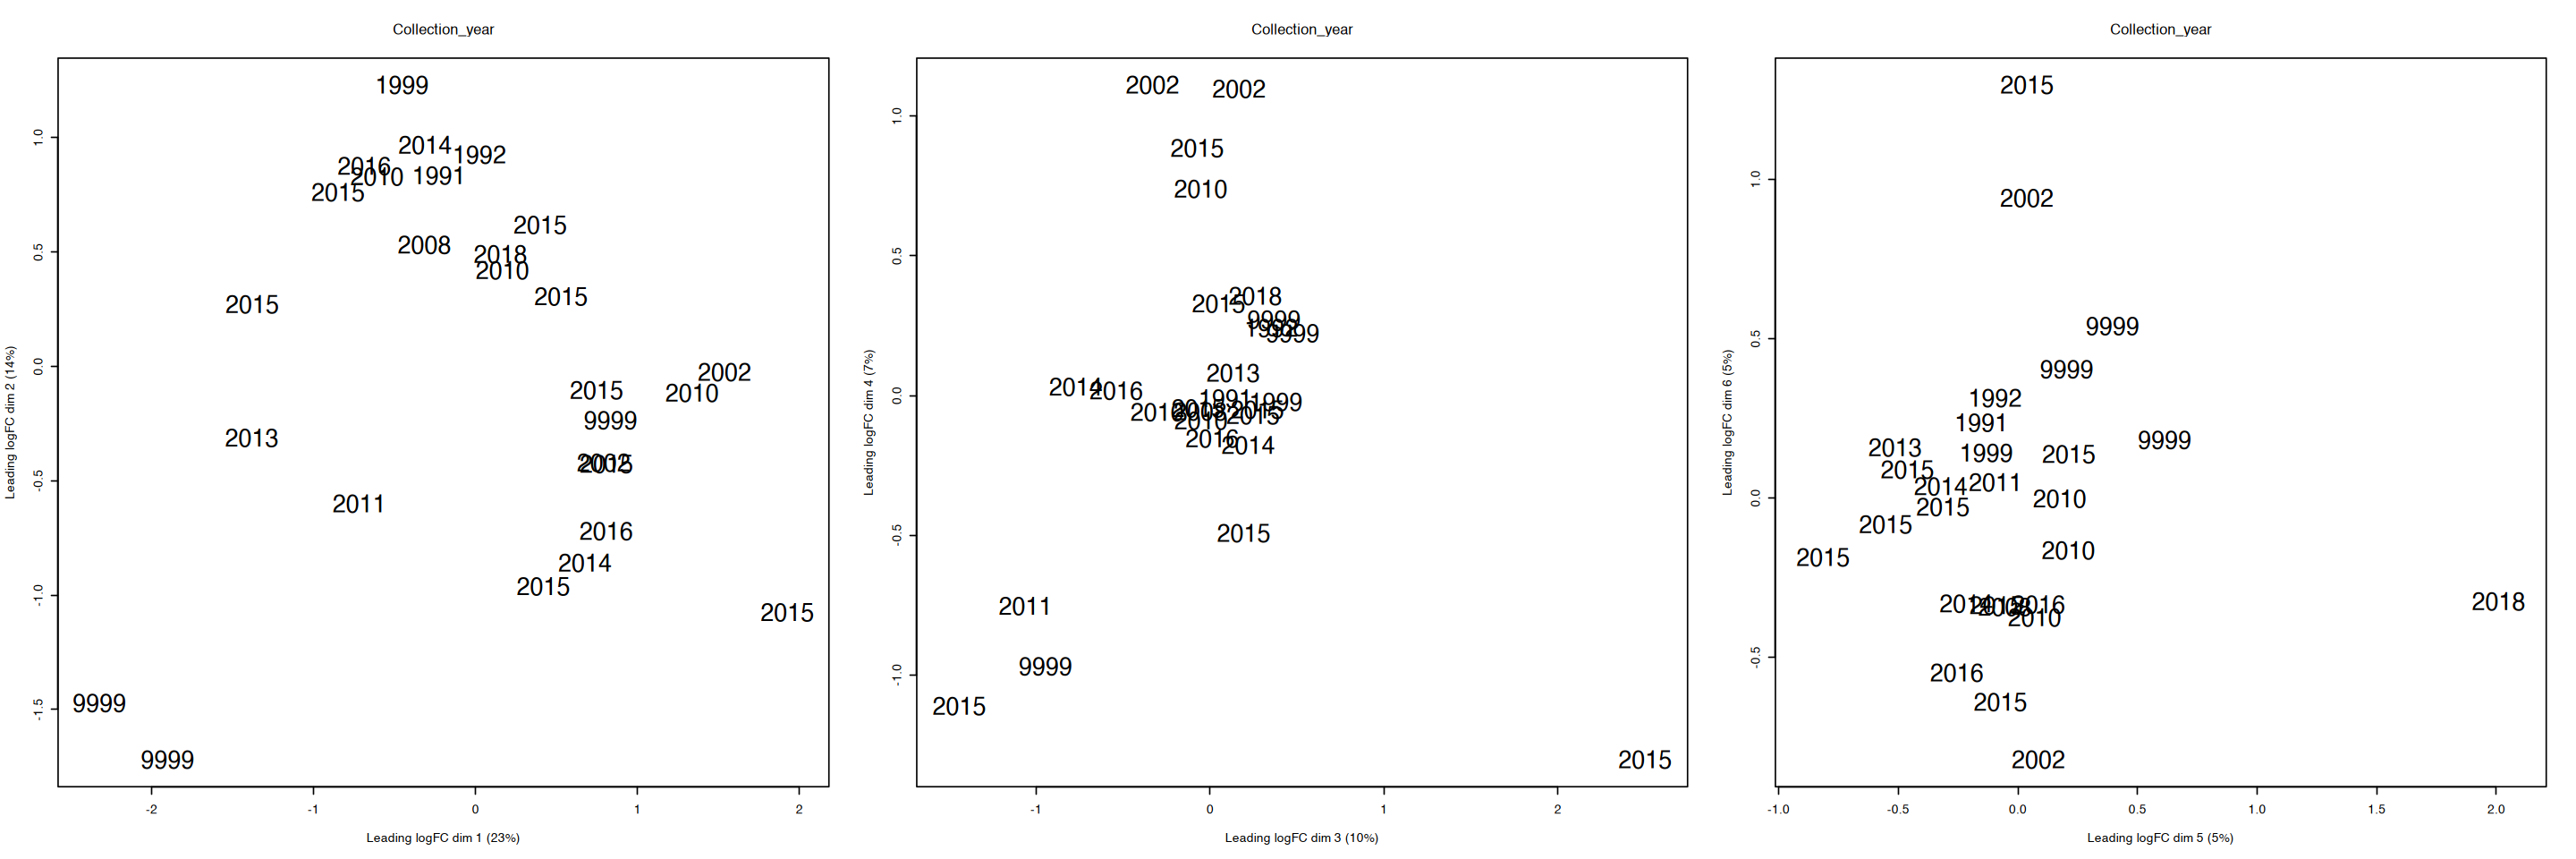

In [33]:
icd = as.factor( x$samples$Collection_year)
plot_mds_feats_noCol( feat=icd, title="Collection_year", cc="Set1")

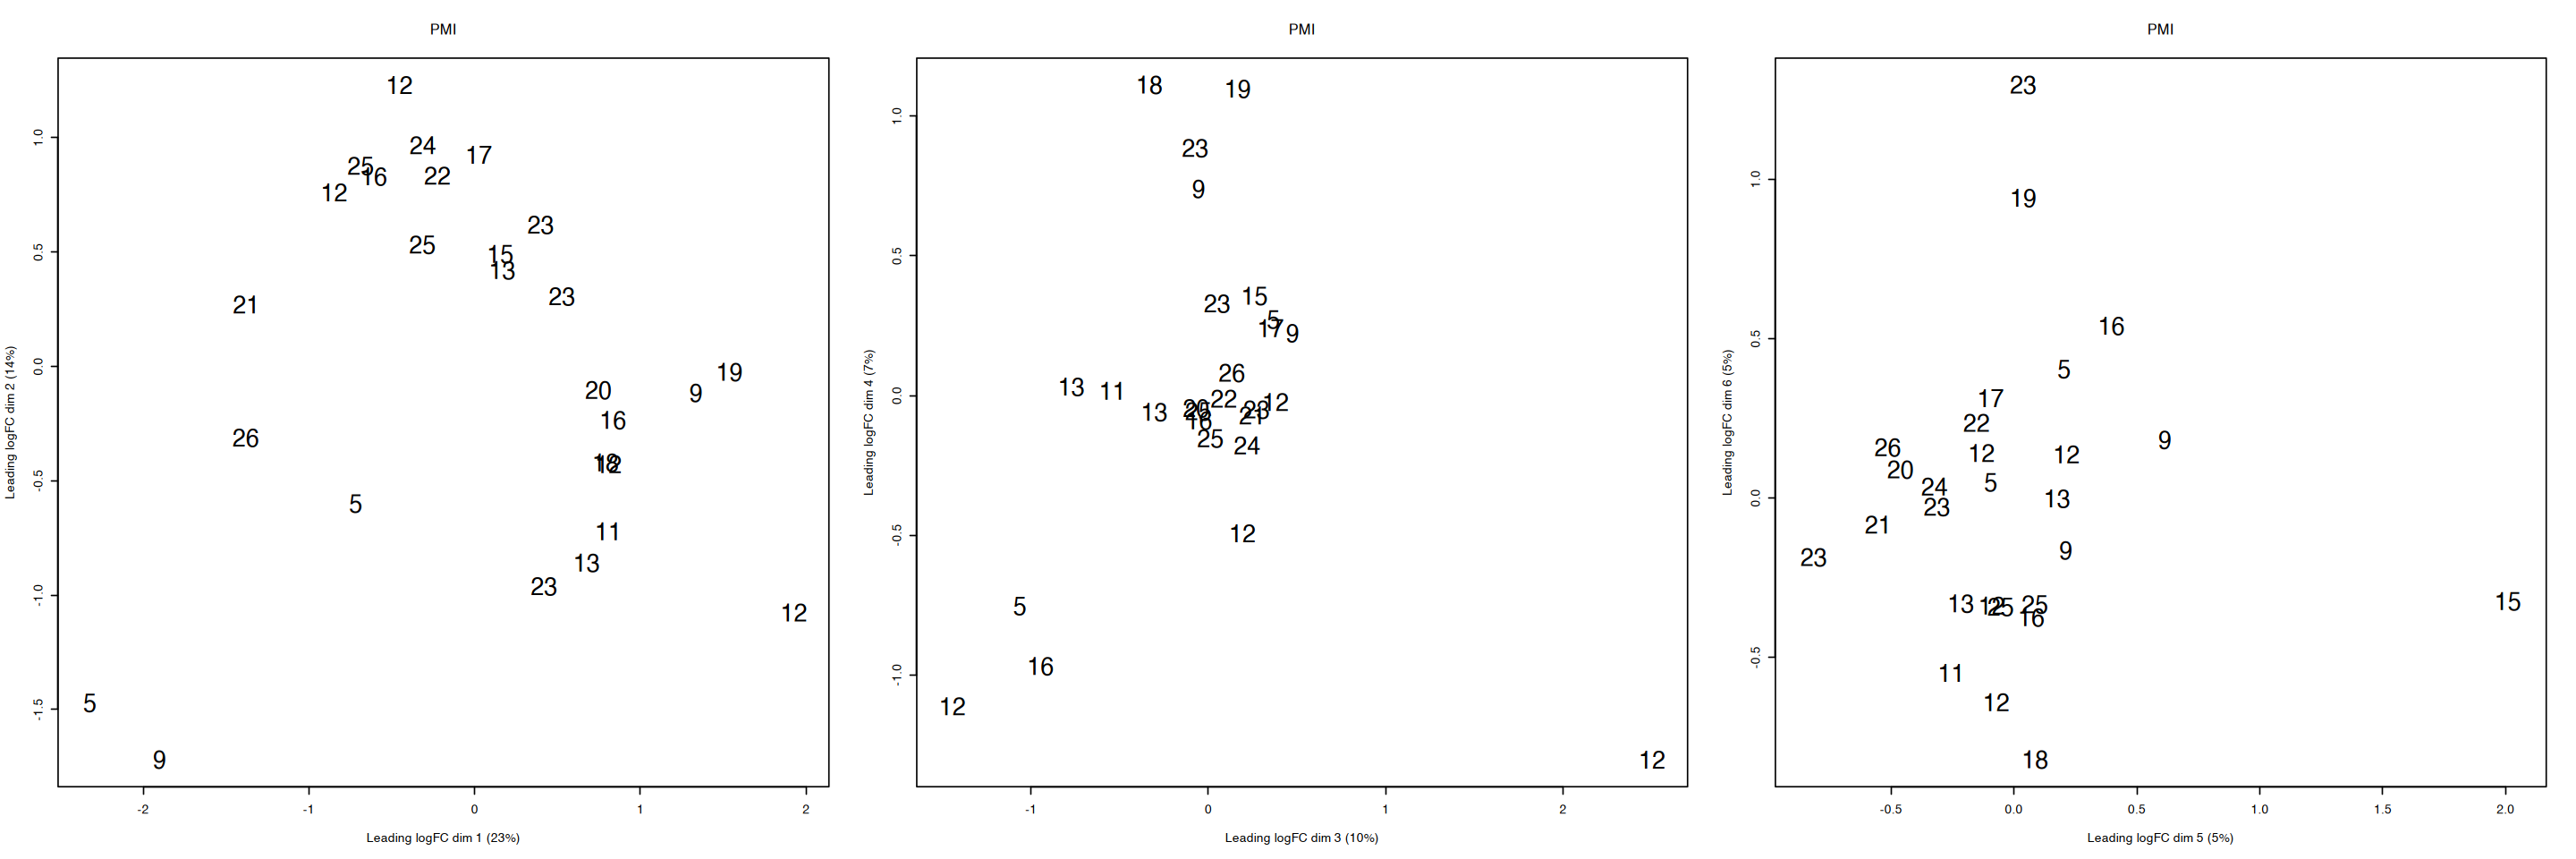

In [34]:
icd = as.factor( x$samples$PMI)
plot_mds_feats_noCol( feat=icd, title="PMI", cc="Set1")

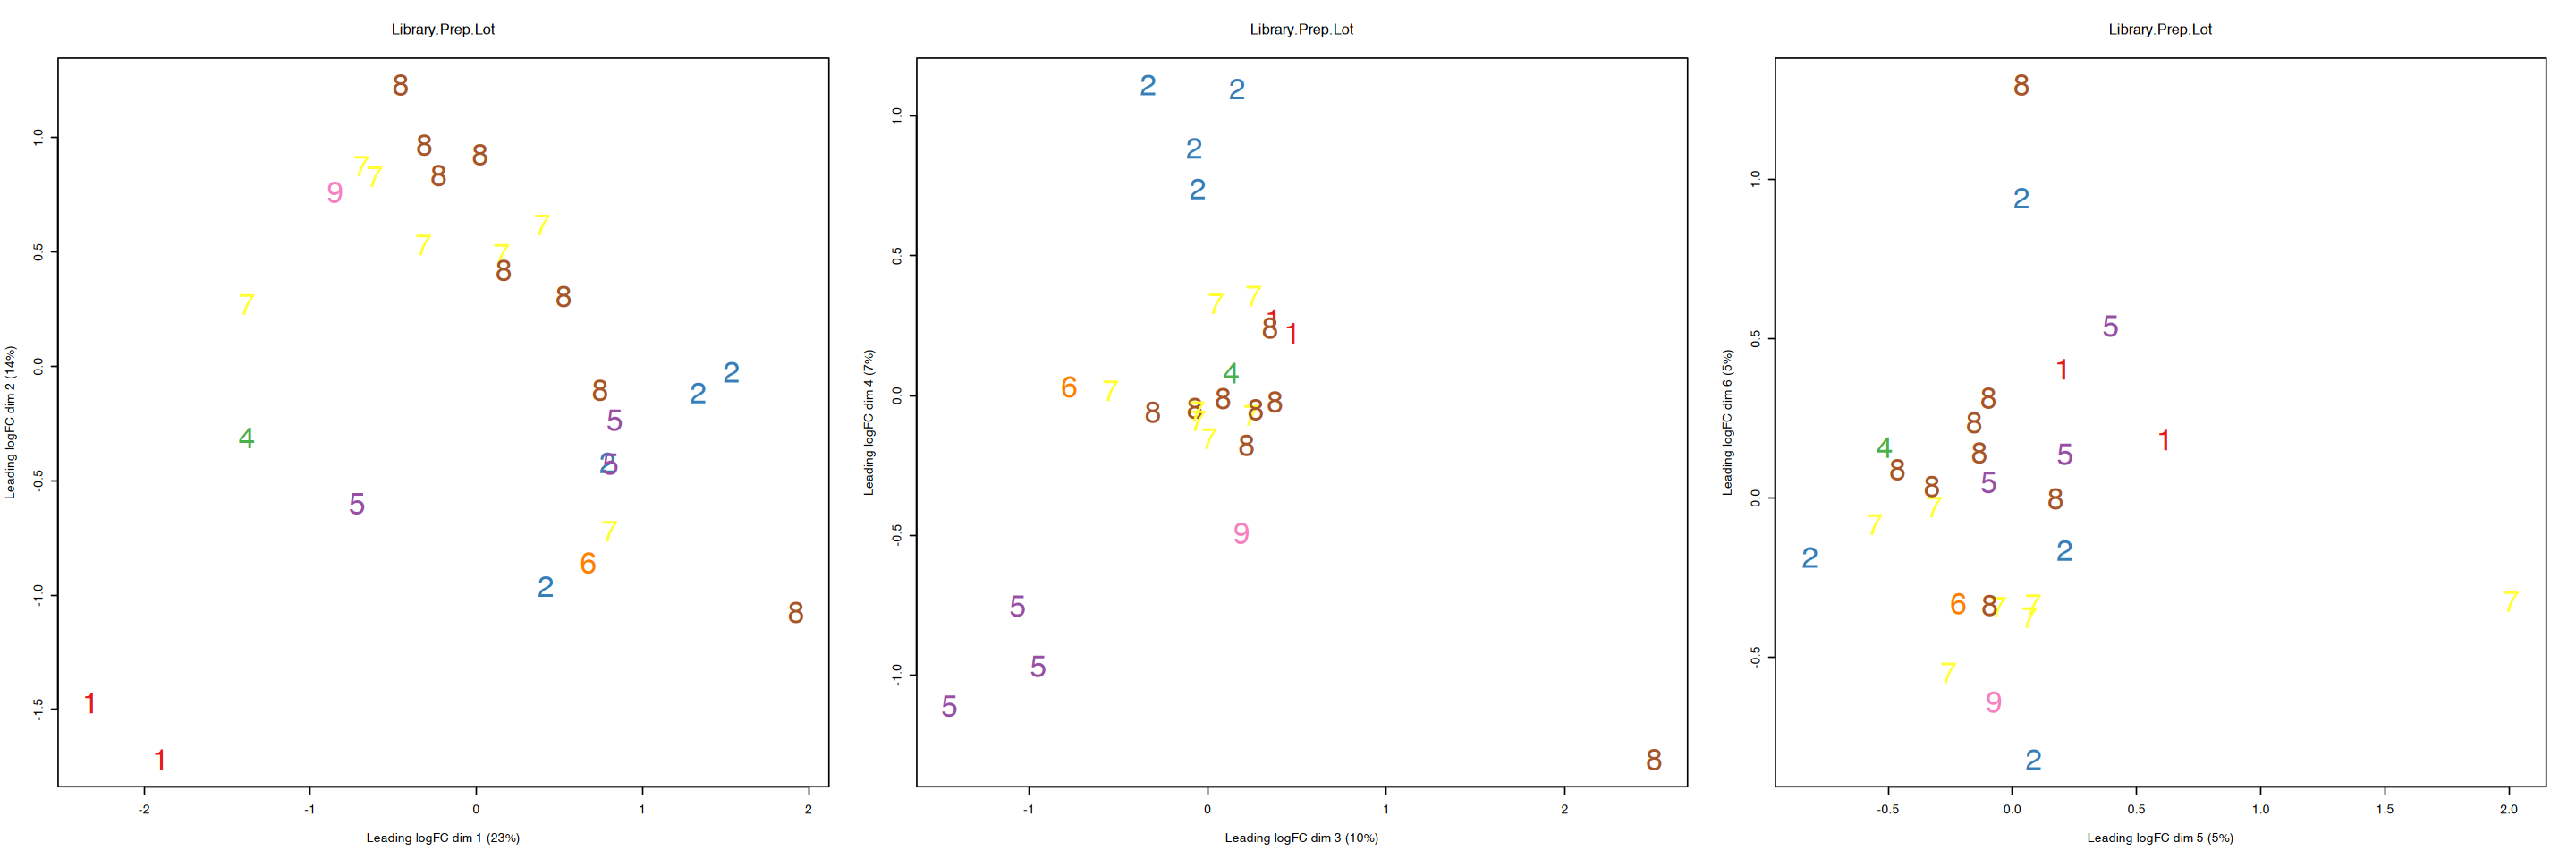

In [35]:
icd = as.factor( x$samples$Library.Prep.Lot)
plot_mds_feats( feat=icd, title="Library.Prep.Lot", cc="Set1")

In [36]:
plot_mds_feats <- function( feat, title, mds=lcpm, cc="Set1") {
    # get colors for each level of factor
    fact <- feat
    print( nlevels( fact))
    levels( fact) <- brewer.pal( nlevels( fact), cc)
    char_vec <- as.character( fact)
    # set number of rows and columns for plots
    n_cols <- 3
    n_rows <- 1 
    n_plts <- n_cols*n_rows
    par( mfrow=c(n_rows,n_cols))
    # set figure size
    options( repr.plot.width=8*n_cols, repr.plot.height=8*n_rows)
    for (itr in seq(1,6,2)){
        plotMDS( mds, top=1000, labels=feat, col=char_vec, dim=c(itr,itr+1), cex=2.5)
        title(main=title)
    }
}

In [37]:
x$samples$ICD.10.category

[1] "Perinatal"          "Perinatal"          "Perinatal"         
 [4] "Asphyxia"           "Asphyxia"           "Asphyxia"          
 [7] "Circulatory System" "Asphyxia"           "Hyperthermia"      
[10] "Cardiac"            "Drowning"           "Drowning"          
[13] "Drowning"           "Illness"            "Accident"          
[16] "Drowning"           "Accident"           "Suicide"           
[19] "Suicide"            "Drowning"           "Respiratory"       
[22] "Suicide"            "Accident"           "Accident"          
[25] "Accident"           "Circulatory System" "Cardiac"

[1] 10


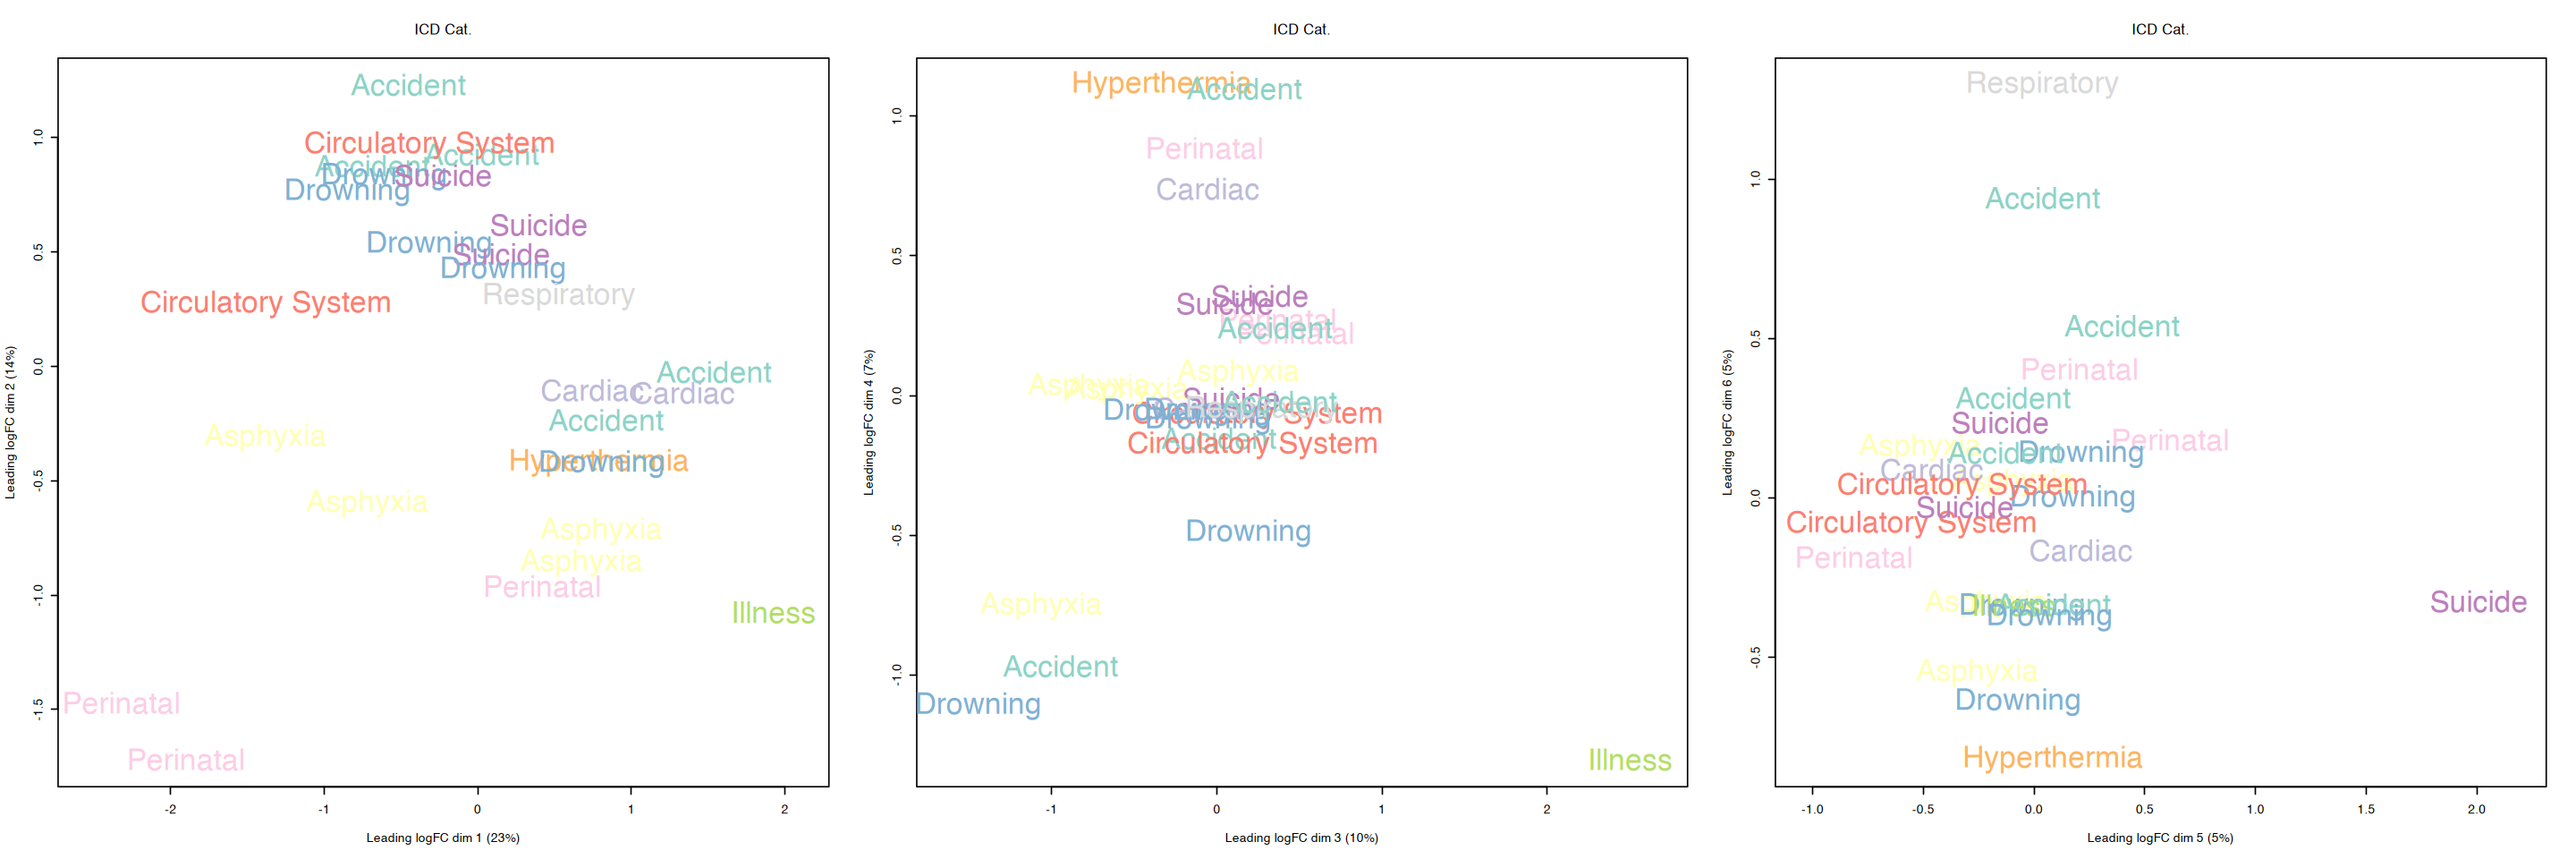

In [38]:
icd = as.factor( x$samples$ICD.10.category)
plot_mds_feats( feat=icd, title="ICD Cat.", cc="Set3")

### Create design matrix

In [39]:
chem <- as.factor( x$samples$chem)
sex  <- as.factor( x$samples$Sex)
lot  <- as.factor( x$samples$Library.Prep.Lot)

In [40]:
design <- model.matrix(~0+group+chem+sex+lot)
colnames(design) <- gsub("group", "", colnames(design))
design

Adolescence Adult Childhood Fetal Infancy Neonatal chemv3 sexM lot2 lot4
1  0           0     0         1     0       0        1      1    0    0   
2  0           0     0         1     0       0        1      1    0    0   
3  0           0     0         1     0       0        1      0    1    0   
4  0           0     0         0     0       1        1      0    0    1   
5  0           0     0         0     0       1        0      1    0    0   
6  0           0     0         0     1       0        1      1    0    0   
7  0           0     0         0     1       0        1      0    0    0   
8  0           0     0         0     1       0        1      1    0    0   
9  0           0     0         0     1       0        1      1    1    0   
10 0           0     1         0     0       0        1      0    0    0   
11 0           0     1         0     0       0        1      1    0    0   
12 0           0     1         0     0       0        0      1    0    0   
13 0           0     1         0     0       0        1      1    0    0   
14 0           0     1         0     0       0        1      0    0    0   
15 0           0     1         0     0       0        1      1    0    0   
16 0           0     1         0     0       0        1      1    0    0   
17 0           0     1         0     0       0        0      1    0    0   
18 1           0     0         0     0       0        1      1    0    0   
19 1           0     0         0     0       0        1      0    0    0   
20 1           0     0         0     0       0        1      1    0    0   
21 1           0     0         0     0       0        1      0    0    0   
22 1           0     0         0     0       0        1      0    0    0   
23 1           0     0         0     0       0        1      0    0    0   
24 0           1     0         0     0       0        1      0    1    0   
25 0           1     0         0     0       0        1      0    0    0   
26 0           1     0         0     0       0        1      0    0    0   
27 0           1     0         0     0       0        1      1    1    0   
   lot5 lot6 lot7 lot8 lot9
1  0    0    0    0    0   
2  0    0    0    0    0   
3  0    0    0    0    0   
4  0    0    0    0    0   
5  1    0    0    0    0   
6  0    1    0    0    0   
7  0    0    1    0    0   
8  0    0    1    0    0   
9  0    0    0    0    0   
10 0    0    0    1    0   
11 0    0    1    0    0   
12 1    0    0    0    0   
13 0    0    0    0    1   
14 0    0    0    1    0   
15 0    0    1    0    0   
16 0    0    1    0    0   
17 1    0    0    0    0   
18 0    0    1    0    0   
19 0    0    0    1    0   
20 0    0    0    1    0   
21 0    0    0    1    0   
22 0    0    1    0    0   
23 0    0    0    1    0   
24 0    0    0    0    0   
25 0    0    0    1    0   
26 0    0    0    1    0   
27 0    0    0    0    0

In [41]:
colnames(design) <- make.names( colnames( design))
colnames(design)

[1] "Adolescence" "Adult"       "Childhood"   "Fetal"       "Infancy"    
 [6] "Neonatal"    "chemv3"      "sexM"        "lot2"        "lot4"       
[11] "lot5"        "lot6"        "lot7"        "lot8"        "lot9"

In [42]:
### need to be sure to only make comparison of stages present in data
# pull stage_ids in design matrix
contr_nms <- colnames( design)
# pull intersect with stage_order
inter_nms <- intersect( stage_order, contr_nms)
# create contrast vector for comparisons across stages
num_nms = length( inter_nms)
# empty vector to hold contrast comparisons
comp_vec = c()
# append comparisons
for (itr in 1:num_nms){
    itr_nms2 <- inter_nms[-c(1:itr)]
    itr_nms1 <- rep( c(inter_nms[itr]), times=length(itr_nms2))
    comp_vec <- append( comp_vec, paste( itr_nms1, itr_nms2, sep='-'))
}
contr.matrix <- makeContrasts( contrasts=comp_vec, levels=colnames( design))
contr.matrix

Contrasts
Levels        Fetal-Neonatal Fetal-Infancy Fetal-Childhood Fetal-Adolescence
  Adolescence  0              0             0              -1               
  Adult        0              0             0               0               
  Childhood    0              0            -1               0               
  Fetal        1              1             1               1               
  Infancy      0             -1             0               0               
  Neonatal    -1              0             0               0               
  chemv3       0              0             0               0               
  sexM         0              0             0               0               
  lot2         0              0             0               0               
  lot4         0              0             0               0               
  lot5         0              0             0               0               
  lot6         0              0             0               0               
  lot7         0              0             0               0               
  lot8         0              0             0               0               
  lot9         0              0             0               0               
             Contrasts
Levels        Fetal-Adult Neonatal-Infancy Neonatal-Childhood
  Adolescence  0           0                0                
  Adult       -1           0                0                
  Childhood    0           0               -1                
  Fetal        1           0                0                
  Infancy      0          -1                0                
  Neonatal     0           1                1                
  chemv3       0           0                0                
  sexM         0           0                0                
  lot2         0           0                0                
  lot4         0           0                0                
  lot5         0           0                0                
  lot6         0           0                0                
  lot7         0           0                0                
  lot8         0           0                0                
  lot9         0           0                0                
             Contrasts
Levels        Neonatal-Adolescence Neonatal-Adult Infancy-Childhood
  Adolescence -1                    0              0               
  Adult        0                   -1              0               
  Childhood    0                    0             -1               
  Fetal        0                    0              0               
  Infancy      0                    0              1               
  Neonatal     1                    1              0               
  chemv3       0                    0              0               
  sexM         0                    0              0               
  lot2         0                    0              0               
  lot4         0                    0              0               
  lot5         0                    0              0               
  lot6         0                    0              0               
  lot7         0                    0              0               
  lot8         0                    0              0               
  lot9         0                    0              0               
             Contrasts
Levels        Infancy-Adolescence Infancy-Adult Childhood-Adolescence
  Adolescence -1                   0            -1                   
  Adult        0                  -1             0                   
  Childhood    0                   0             1                   
  Fetal        0                   0             0                   
  Infancy      1                   1             0                   
  Neonatal     0                   0             0                   
  chemv3       0                   0             0                   
  sexM         0                   0             

Coefficients not estimable: lot5 


Warning message:
“Partial NA coefficients for 19508 probe(s)”


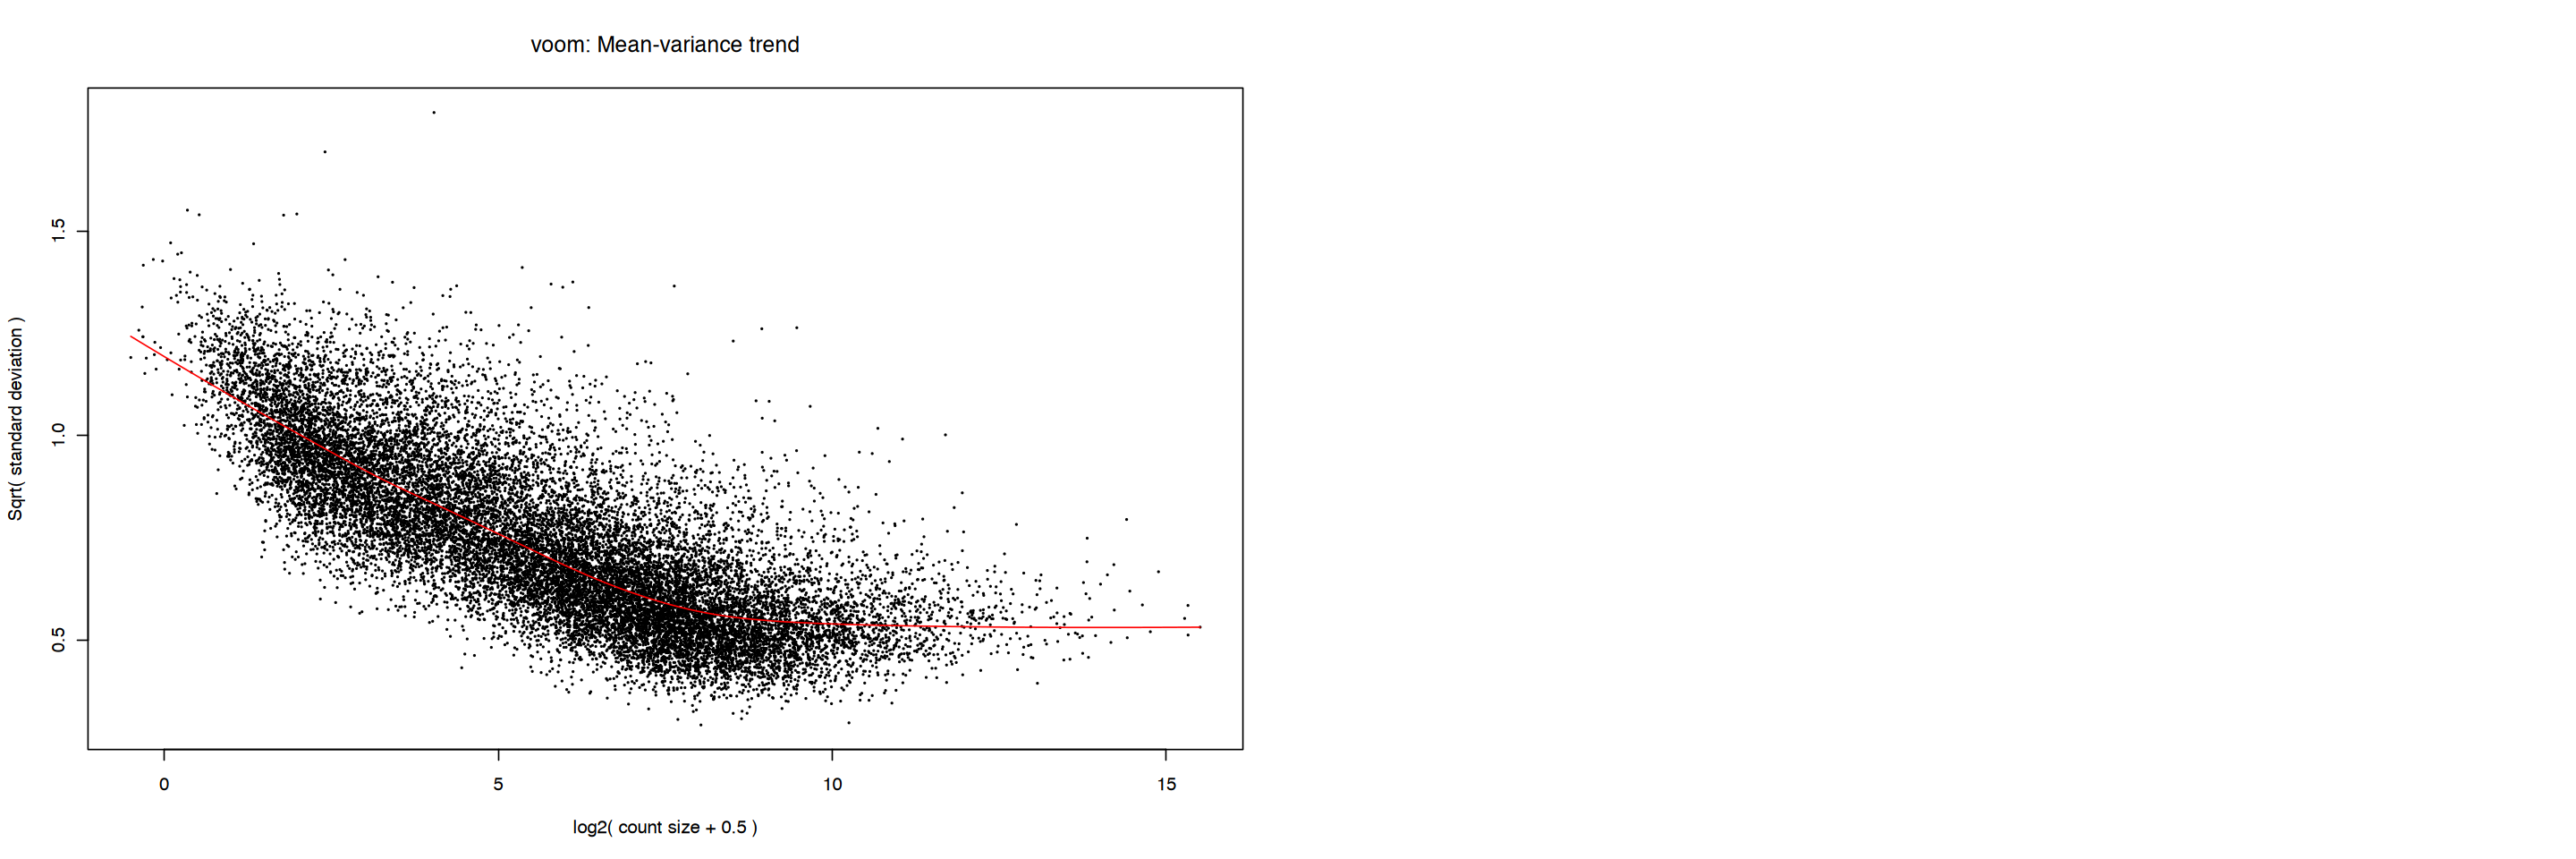

In [43]:
par(mfrow=c(1,2))
v <- voom(x, design, plot=TRUE)
# v

Coefficients not estimable: lot5 


Warning message:
“Partial NA coefficients for 19508 probe(s)”


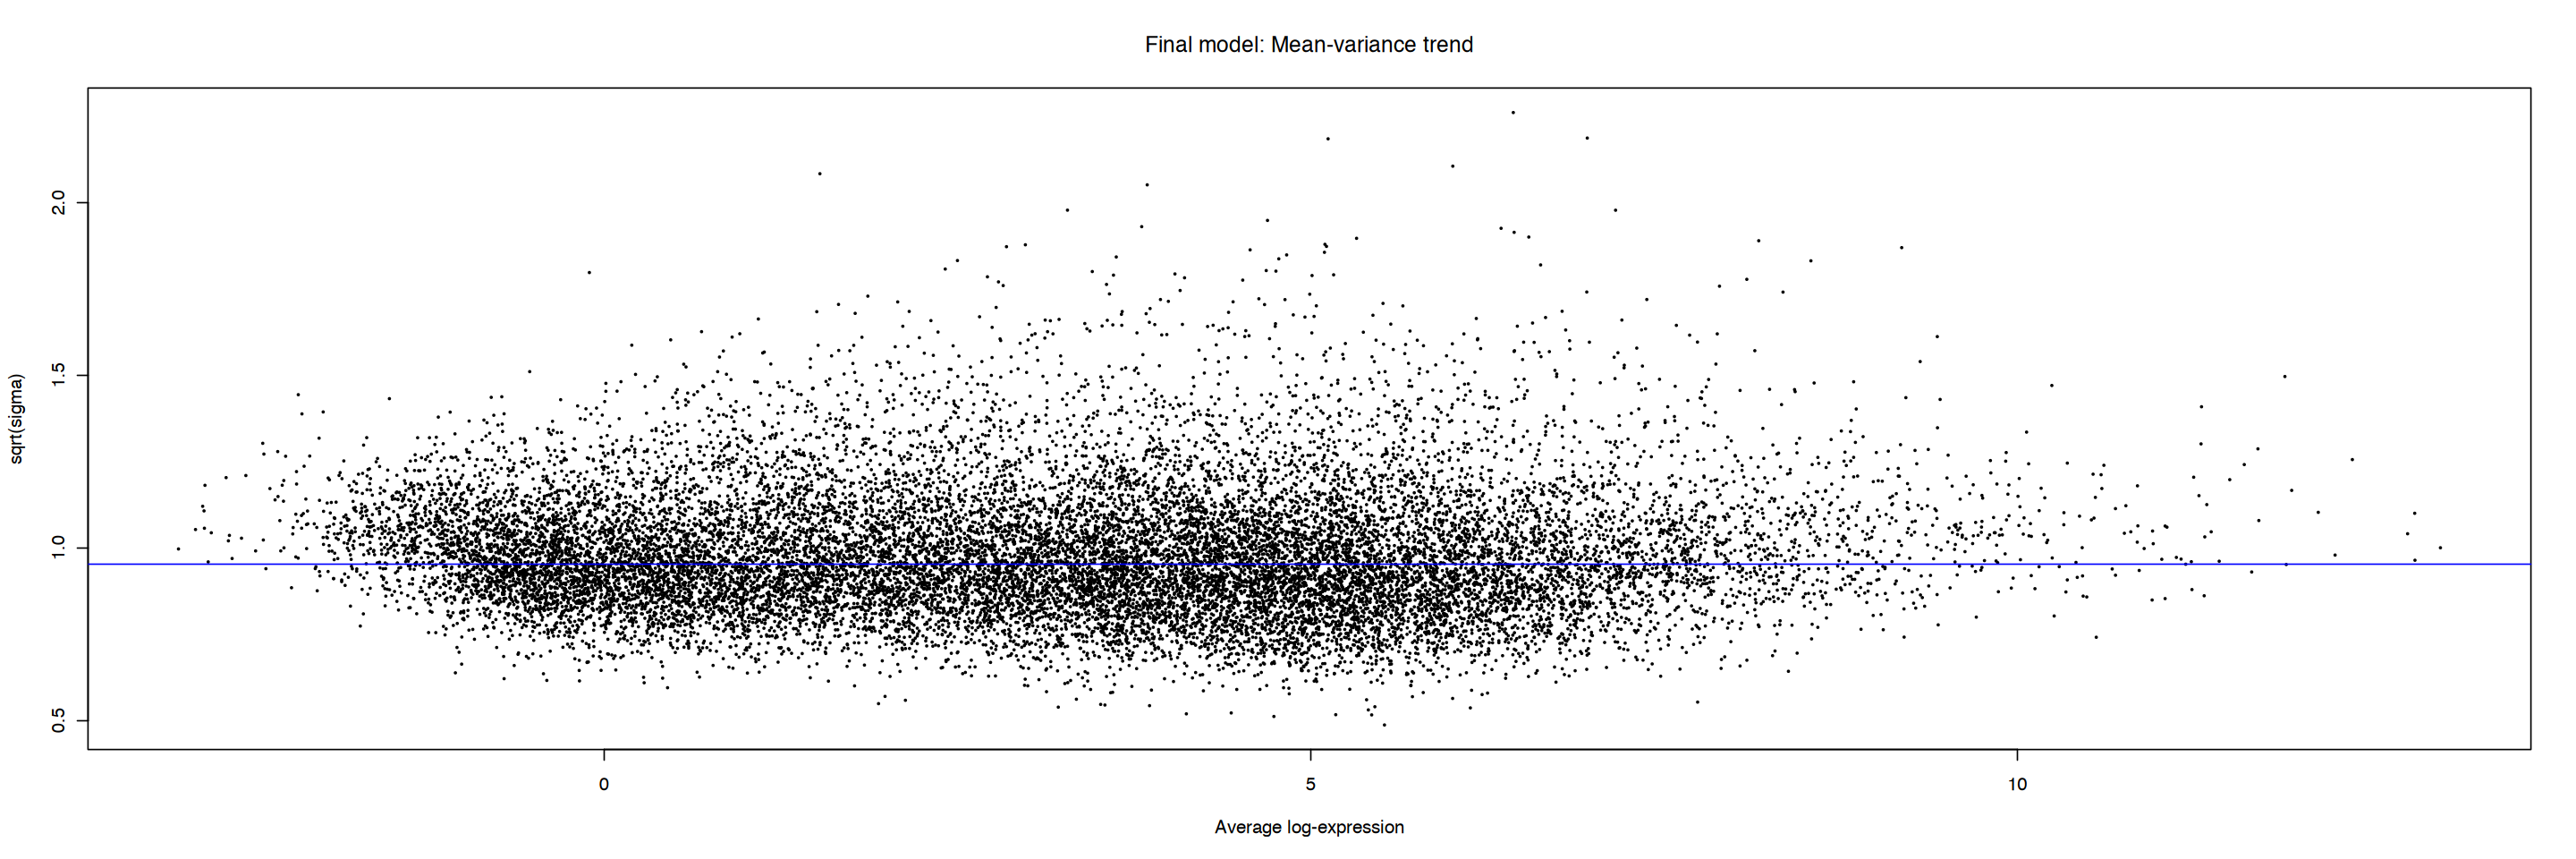

In [44]:
vfit <- lmFit(v, design)
vfit <- contrasts.fit(vfit, contrasts=contr.matrix)
efit <- eBayes(vfit)
plotSA(efit, main="Final model: Mean-variance trend")

In [45]:
summary(decideTests(efit))

       Fetal-Neonatal Fetal-Infancy Fetal-Childhood Fetal-Adolescence
Down                0             0               0                 4
NotSig          19508         19508           19507             19492
Up                  0             0               1                12
       Fetal-Adult Neonatal-Infancy Neonatal-Childhood Neonatal-Adolescence
Down            36                0                  1                    5
NotSig       19399            19508              19501                19492
Up              73                0                  6                   11
       Neonatal-Adult Infancy-Childhood Infancy-Adolescence Infancy-Adult
Down                4                 0                 128           333
NotSig          19497             19508               19272         18823
Up                  7                 0                 108           352
       Childhood-Adolescence Childhood-Adult Adolescence-Adult
Down                       0               0             

In [46]:
tfit <- treat(vfit, lfc=1)
dt <- decideTests(tfit)
summary(dt)

       Fetal-Neonatal Fetal-Infancy Fetal-Childhood Fetal-Adolescence
Down                0             0               0                 0
NotSig          19508         19508           19508             19508
Up                  0             0               0                 0
       Fetal-Adult Neonatal-Infancy Neonatal-Childhood Neonatal-Adolescence
Down             0                0                  0                    0
NotSig       19506            19508              19508                19508
Up               2                0                  0                    0
       Neonatal-Adult Infancy-Childhood Infancy-Adolescence Infancy-Adult
Down                0                 0                   2             3
NotSig          19508             19508               19506         19505
Up                  0                 0                   0             0
       Childhood-Adolescence Childhood-Adult Adolescence-Adult
Down                       0               0             

In [47]:
# saveRDS( tfit, "/data/tfit_whole-tissue_stages.RDS")